In [4]:
%run data_preprocessing.ipynb

19
10
13
18
20
21
9
{0: [13, 7, 13, 14, 13, 10, 5, 4, 3, 2, 2, 0, 4, 12, 13, 14, 5, 3, 10, 9, 14, 10, 1, 2, 4, 7, 26, 4, 12, 12, 23, 22, 27, 10, 12, 17, 44, 3, 4, 19, 7, 16, 9, 42, 57, 14, 14, 18, 17, 16, 18, 23, 4, 19, 5, 2, 18, 8, 6, 6, 3, 5, 4, 4, 4, 4, 9, 21, 19, 5, 19, 16, 33, 11, 11, 11, 66, 11, 15, 5, 13, 14, 4, 4, 3, 1, 3, 1, 3, 2, 4, 1, 0, 21, 20, 20, 20, 39, 12, 11, 5, 4, 22, 13, 13, 13, 15, 8, 11, 8, 12, 16, 16, 7, 4, 5, 4, 5, 5, 6, 2, 3, 7, 14, 16, 8, 8, 14, 8, 10, 11, 9, 150, 9, 7, 10, 14, 12, 166, 6, 5, 11, 1, 5, 6, 7, 4, 1, 2, 2, 1, 6, 0, 16, 14, 9, 19, 11, 8, 9, 21, 33, 31, 30, 65, 73, 45, 64, 61, 90, 66, 51, 26, 15, 22, 20, 12, 7, 7, 10, 8, 8, 99, 59, 55, 43, 21, 14, 21, 26, 25, 26, 26, 38, 38, 35, 24, 15, 14, 18, 11, 12, 11, 8, 17, 16, 21, 12, 8, 20, 47, 66, 51, 67, 46, 48, 11, 14, 12, 18, 15, 25, 20, 17, 24, 15, 20, 16, 17, 11, 9, 16, 15, 12, 14, 17, 20, 18, 16, 14, 17, 14, 65, 63, 37, 57, 44, 28, 9, 5, 7, 5, 8, 5, 6, 5, 11, 10, 9, 6, 7, 10, 11, 10, 8, 0, 5, 6, 9, 7,

[([833.0, 2806.0, 6484.0, 6839.0], (1, 312.0, 2)), ([2806.0, 6484.0, 6839.0, 0.0], (1, 87.0, 1)), ([6484.0, 6839.0, 0.0, 312.0], (1, 67.0, 1)), ([6839.0, 0.0, 312.0, 87.0], (1, 52.0, 1)), ([0.0, 312.0, 87.0, 67.0], (1, 41.0, 1)), ([312.0, 87.0, 67.0, 52.0], (1, 25.0, 1)), ([87.0, 67.0, 52.0, 41.0], (1, 325.0, 2)), ([67.0, 52.0, 41.0, 25.0], (1, 1166.0, 2)), ([52.0, 41.0, 25.0, 325.0], (1, 3659.0, 2)), ([41.0, 25.0, 325.0, 1166.0], (1, 14591.0, 2)), ([25.0, 325.0, 1166.0, 3659.0], (1, 4546.0, 2)), ([325.0, 1166.0, 3659.0, 14591.0], (1, 314.0, 2)), ([1166.0, 3659.0, 14591.0, 4546.0], (1, 374.0, 2)), ([3659.0, 14591.0, 4546.0, 314.0], (1, 86.0, 1)), ([14591.0, 4546.0, 314.0, 374.0], (1, 68.0, 1)), ([4546.0, 314.0, 374.0, 86.0], (1, 69.0, 1)), ([314.0, 374.0, 86.0, 68.0], (1, 0.0, 0)), ([374.0, 86.0, 68.0, 69.0], (1, 0.0, 0)), ([86.0, 68.0, 69.0, 0.0], (1, 512.0, 2)), ([68.0, 69.0, 0.0, 0.0], (1, 1041.0, 2)), ([69.0, 0.0, 0.0, 512.0], (1, 2136.0, 2)), ([0.0, 0.0, 512.0, 1041.0], (1, 4003.0

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot
import math
import pmdarima as pm
from scipy import stats
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
from scipy.special import inv_boxcox
from sklearn.model_selection import ParameterGrid
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization

### Combining Auto Arima with Prophet
Results
1. Auto-Arima achieved 68% accuracy rate when predicting the states of the next two months
2. Combined with prophet, achieves around 67-77% accuracy (best recorded 79% accuracy)

In [77]:
country_monthly_thresholds = monthly_thresholds[22]
def compare_predicted_state_to_ground_truth(predicted_no_cases, ground_truth, threshold=country_monthly_thresholds):
    predicted_state = find_state(threshold, predicted_no_cases)
    if predicted_state != ground_truth:
        print("Predicted: {0} Correct: {1}".format(predicted_state, ground_truth))
    return int(predicted_state == ground_truth)

In [89]:
## Testing Autoarima On Monthly Data

#lmbda is the value to add to the training_data to make it non-negative - it's applied manually to the df
#which will be used by prophet and automatically in the pipeline defined by the Auto-Arima model
lmbda=1e-6

month_data_burkina = month_data.loc[month_data["Country"] == 22]
month_data_burkina = month_data.loc[month_data["Date"].dt.year >= 2010]
#Apply Box-Cox transformation to prophet data since that is not gonna go through the pipeline of auto_arima
month_data_burkina_prophet = month_data_burkina.copy()

# X_prophet = month_data_burkina_prophet["Cases"].values
# X_prophet = stats.boxcox(X_prophet, lmbda=lmbda)
# prophet fits a more stable model when we plot log(x+1) of the data
std = month_data_burkina_prophet["Cases"].std()
month_data_burkina_prophet["Cases"] = month_data_burkina_prophet["Cases"].apply(lambda x: math.log(x+1))
month_data_burkina_prophet = month_data_burkina_prophet.rename(columns={"Date":"ds", "Cases":"y"})
month_data_burkina_prophet = month_data_burkina_prophet.drop(columns=["State", "Country"])

#Note that we will apply a BoxCox transformation on the data but will integrate it into the pipeline
X = month_data_burkina["Cases"].values
separation = int(len(month_data_burkina) * 0.8)

#note must be numpy arrays
train_data = X[:separation]
test_data = X[separation:]
test_states = month_data_burkina[separation:]["State"]
test_states = test_states.reset_index(drop=True)
burkina_monthly_thresholds = monthly_thresholds[22]
print(monthly_thresholds[22])
month_data_burkina.head()

[19.2, 57.99999999999997]


,Date,Country,Cases,State
48,2010-01-31,1,645.0,2
49,2010-02-28,1,1235.0,2
50,2010-03-31,1,1947.0,2
51,2010-04-30,1,1820.0,2
52,2010-05-31,1,362.0,2


In [90]:
class AutoArima():
    def __init__(self):
        self.model = Pipeline([
                        ('boxcox', BoxCoxEndogTransformer(lmbda2=lmbda)),
                        ('arima', pm.AutoARIMA(trace=True,
                                               suppress_warnings=True,
                                               m=12))
                    ])
    def fit(self, train_data):
        self.model.fit(train_data)
        
auto_arima = AutoArima()
auto_arima.fit(train_data)
auto_arima.model.summary()


Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=4404.125, BIC=4441.265, Time=2.347 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=4729.066, BIC=4738.351, Time=0.023 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=4584.862, BIC=4603.432, Time=0.252 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=4534.828, BIC=4553.397, Time=0.454 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=4727.069, BIC=4731.712, Time=0.027 seconds
Fit ARIMA(2,1,2)x(0,0,1,12) [intercept=True]; AIC=4432.803, BIC=4465.301, Time=1.284 seconds
Fit ARIMA(2,1,2)x(1,0,0,12) [intercept=True]; AIC=4431.562, BIC=4464.059, Time=1.142 seconds
Fit ARIMA(2,1,2)x(2,0,1,12) [intercept=True]; AIC=4423.135, BIC=4464.918, Time=4.062 seconds
Fit ARIMA(2,1,2)x(1,0,2,12) [intercept=True]; AIC=4423.642, BIC=4465.424, Time=5.547 seconds
Fit ARIMA(2,1,2)x(0,0,0,12) [intercept=True]; AIC=4435.550, BIC=4463.405, Time=0.501 seconds
Fit ARIMA(2,1,2)x(0,0,2,12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  768
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -2189.009
Date:                              Sun, 31 May 2020   AIC                           4396.019
Time:                                      21:18:20   BIC                           4437.801
Sample:                                           0   HQIC                          4412.102
                                              - 768                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.864e-05   9.31e-05     -0.200      0.841      -0.000       0.000
ar.L1          0.8521      0.117      7.271      0.000       0.622       1.082
ar.L2          0.0121      0.041      0.292      0.770      -0.069       0.093
ar.L3         -0.2330      0.030     -7.698      0.000      -0.292      -0.174
ma.L1         -1.5498      0.118    -13.134      0.000      -1.781      -1.319
ma.L2          0.5844      0.113      5.170      0.000       0.363       0.806
ar.S.L12       0.9957      0.009    106.949      0.000       0.977       1.014
ma.S.L12      -0.9781      0.027    -36.500      0.000      -1.031      -0.926
sigma2        18.6810      0.919     20.323      0.000      16.879      20.483
===================================================================================
Ljung-Box (Q):                       81.84   Jarque-Bera (JB):               164.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.47   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Test 1: 
Combining Prophet with Auto-Arima by making a proporitional adjustment to auto-arima prediction based on the predictions of prophet

/Users/amirgirgis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amirgirgis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/amirgirgis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to b

            ds     trend  cap  floor  yhat_lower  yhat_upper  trend_lower  \
0   2010-01-31  6.023739   12      0    1.753529    6.018644     6.023739   
1   2010-01-31  6.023739   12      0    1.530135    5.869630     6.023739   
2   2010-01-31  6.023739   12      0    1.701813    5.908711     6.023739   
3   2010-01-31  6.023739   12      0    1.777997    6.045308     6.023739   
4   2010-01-31  6.023739   12      0    1.660431    6.058269     6.023739   
..         ...       ...  ...    ...         ...         ...          ...   
953 2019-12-31  6.573318   12      0    0.757642    5.085835     6.573318   
954 2019-12-31  6.573318   12      0    0.663113    5.008154     6.573318   
955 2019-12-31  6.573318   12      0    0.746293    4.902476     6.573318   
956 2019-12-31  6.573318   12      0    0.661482    5.062849     6.573318   
957 2019-12-31  6.573318   12      0    0.805946    5.153048     6.573318   

     trend_upper  additive_terms  additive_terms_lower  ...   monthly  \
0 

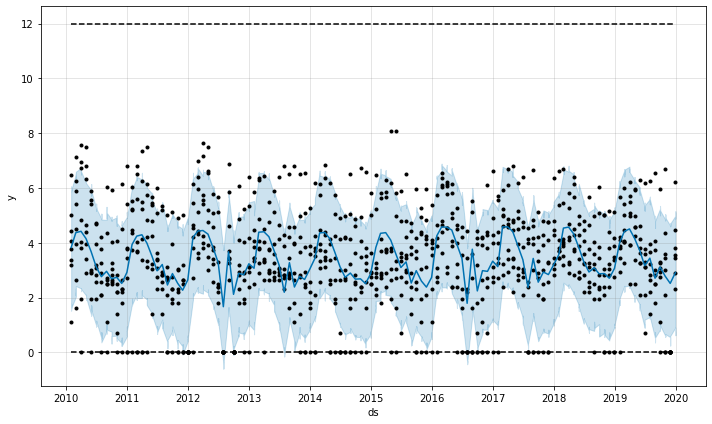

In [91]:
#Before combining Prophet with Auto-Arima, we will see what parameters allow for a good fit on the data
train_prophet = month_data_burkina_prophet[:-2]
train_prophet["floor"] = 0
train_prophet["cap"] = 12
test_prophet = month_data_burkina_prophet[-2:]
test_prophet["floor"] = 0
test_prophet["cap"] = 12

model = Prophet(growth = "logistic", seasonality_mode = "additive", weekly_seasonality=False, \
               changepoint_prior_scale=0.3, yearly_seasonality=False).add_seasonality( 
                                                                    name="monthly",
                                                                    period=30.5,
                                                                    fourier_order=3).add_seasonality(
                                                                    name="yearly",
                                                                    period=365.25,
                                                                    fourier_order=10)

test_prophet = test_prophet.drop(columns=["y"])
test_prophet = test_prophet.reset_index(drop=True)
model.fit(train_prophet)
forecast = model.predict(train_prophet)
fig = model.plot(forecast)
print(forecast)

In [92]:
#A class that will be used to apply statistical significance test at each iteration
#QUESTION: what significance level should the p-value be compared to? Can we make this a learnable parameter?
#Main issue: running this pipeline in parallel with some significance level alpha for our different data streams
#means a false alarm in at least one will be much higher than alpha
class SignificanceTest():
    def __init__(self):
        pass
    
    #previous cases will be the array with the number of cases from previous timesteps
    def calculate_probability_distribution(self, previous_cases):
        sum_cases = sum(previous_cases)
        prob_distribution = previous_cases/sum_cases
        return prob_distribution
    
    #recorded_no_cases is the no_cases at the last most availabe timestep and what the significance level will 
    #determine constitutes a suscpicious peak or not
    #bins has to be quite large since we are going to need to calculate the area thus will increase precision
    def calculate_pvalue(self, prob_distribution, beta=100):
        n, bins, patches = plt.hist(prob_distribution, 
                            bins=beta, 
                            density=True)
        recorded_no_cases = prob_distribution[-1]
        #get bin width
        bin_width = bins[1] - bins[0]
        #the code below will find the index of the first bin value > recorded number of cases
        bin1 = np.searchsorted(bins,recorded_no_cases)
        # sum over number in each bin and mult by bin width, which can be factored out    
        integral = bin_width * sum(n[bin1:])
        return integral
    
    def return_pvalue(self, previous_cases, beta=100):
        prob_distribution = self.calculate_probability_distribution(previous_cases)
        return self.calculate_pvalue(prob_distribution, beta)
    
    #compute an exponentially weighted moving average without a bias correction (since we want to dampen the ewma
    #to not add too large of an adjustment)
    def ewma(self, sequence, beta):
        y_current=(beta*sequence[0])
        for i in range(1, len(sequence)):
            y_current = ((beta*y_current) + (1-beta)*sequence[i])
        return y_current


In [93]:
#a class to handle prophet predicting and fitting which will be used in conjunction with auto_arima
class ProphetTimeStep():
    def __init__(self):
        self.model = None
        self.optimum_parameters = None
    
    #TODO: add features to customize prophet model instantiated
    def instantiate_model(self, growth, seasonality_mode, changepoint_prior_scale, n_changepoints):
        self.model = Prophet(daily_seasonality=False,
                             growth=growth,
                             seasonality_mode=seasonality_mode,
                             changepoint_prior_scale=changepoint_prior_scale).\
                             add_seasonality(name="monthly", period=30.5, fourier_order=3)
                                                                    
    #positional parameters have been changed to the optimum ones found from grid search
    def fit_model(self, df, growth="linear", seasonality_mode="additive", changepoint_prior_scale=0.1,
                         n_changepoints=10):
        model = self.instantiate_model(growth, seasonality_mode, changepoint_prior_scale, n_changepoints)
        self.model.fit(df)
    
    def predict_prophet(self, df, counter):
        df = df[:counter]
        self.fit_model(df)

        future = self.model.make_future_dataframe(2, freq="M")
        forecast = self.model.predict(future)
        #need to inverse the log(x+1) transformation that was applied
        inverse_yhat = forecast["yhat"].apply(lambda x: np.exp(x) + 1)
        inverse_yhat_lower = forecast["yhat_lower"].apply(lambda x: np.exp(x)+1)
        inverse_yhat_upper = forecast["yhat_upper"].apply(lambda x: np.exp(x) + 1)
        forecast["yhat"], forecast["yhat_lower"], forecast["yhat_upper"] = inverse_yhat, inverse_yhat_lower,\
                                                                           inverse_yhat_upper
        return forecast[counter:]
    
    def cross_validate_prophet(self, df):
        df_cv = cross_validation(model, initial="3650 days", period="700 days", horizon="700 days")
        return df_cv
    
    #Note the error terms generated from this are on the log(data) which is why the errors are comparatively 
    #small in magnitude
    def find_optimum_hyperparameters(self):
        params_grid = {'seasonality_mode':('multiplicative','additive'),
                       'changepoint_prior_scale':[0.1,0.3,0.5],
                       'n_changepoints' : [10,20]}
        
        
        grid = ParameterGrid(params_grid)
        model_parameters = pd.DataFrame(columns = ['MAE','Parameters'])
        for p in grid:
            self.fit_model(month_data_burkina_prophet[:separation], seasonality_mode=p['seasonality_mode'])
            df_cv = cross_validation(self.model, initial="1461", period="700 days", horizon="365 days")
            #set rolling window=1 to get only one value for each metric rather than one for each horizon length
            mae = performance_metrics(df_cv, rolling_window=1)["mae"].item()
            print(mae)
            model_parameters = model_parameters.append({'MAE':mae, 'Parameters':p}, ignore_index=True)
        parameters = model_parameters.sort_values(by=['MAE'])
        parameters = parameters.reset_index(drop=True)
        self.optimum_parameters = parameters.loc[0, "Parameters"]
        print('OPTIMUM: ', self.optimum_parameters)
            


In [ ]:
test = ProphetTimeStep()
test.find_optimum_hyperparameters()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


|   iter    |  target   |   alpha   |   beta    |   gamma   |    mu     |
-------------------------------------------------------------------------
[27.000000000000004, 18.0, 22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0]
p-value: 0.6901041666666667 adjustment: 15.903005902725894


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1

>Predicted=[14.79343524 23.26016635], Expected=[39. 52.]
[22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001]
p-value: 0.3597402597402597 adjustment: 31.62591710461823


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 0

>Predicted=[29.73288205 28.04116237], Expected=[71. 11.]
[18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0]
p-value: 0.7059585492227984 adjustment: 34.413675541404466


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[19.38489329 16.62109092], Expected=[30. 19.]
[12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996]
p-value: 0.5658914728682172 adjustment: 29.570780586674097


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[46.9178805  67.81207161], Expected=[14.  6.]
[41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999]
p-value: 0.7912371134020622 adjustment: 21.531985394289208


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[31.50013959 28.51370483], Expected=[12. 10.]
[73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002]
p-value: 0.727506426735218 adjustment: 17.721062419532522


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[22.42532339 23.50521625], Expected=[19. 18.]
[32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996]
p-value: 0.5833333333333331 adjustment: 17.610965549133702


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[15.71216208 24.17370468], Expected=[21. 17.]
[16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996]
p-value: 0.6010230179028139 adjustment: 18.27101017231579


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[18.22114582 17.54458542], Expected=[10. 20.]
[14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0]
p-value: 0.5599489795918365 adjustment: 17.921321428127328


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[12.88730148 15.84743319], Expected=[14. 15.]
[20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0]
p-value: 0.6348600508905848 adjustment: 17.392439453541385


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[32.31318858 50.54861864], Expected=[30. 17.]
[23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996]
p-value: 0.598984771573604 adjustment: 20.669795603131867


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[38.15876534 27.73443124], Expected=[12. 20.]
[12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0]
p-value: 0.5569620253164559 adjustment: 19.02425892460763


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[19.44466386 20.29461128], Expected=[22.  9.]
[16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002]
p-value: 0.7500000000000003 adjustment: 17.54433068067306


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[10.9451628  15.64650512], Expected=[102. 586.]
[32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002]
p-value: 0.059193954659949484 adjustment: 199.79815532412482


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[351.51350912 334.23060758], Expected=[475. 133.]
[14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997]
p-value: 0.22738693467336685 adjustment: 237.07873105071025


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[73.01609724 55.53777899], Expected=[24.  4.]
[24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999]
p-value: 0.828320802005012 adjustment: 127.39133914873469


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[38.15863326 52.82063856], Expected=[0. 0.]
[104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0]
p-value: 0.9999999999999996 adjustment: 68.70608059144568


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[13.42998128 19.88246245], Expected=[1. 6.]
[477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999]
p-value: 0.7917705735660846 adjustment: 41.905796422239455


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.70544668 38.20107002], Expected=[ 1. 12.]
[25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0]
p-value: 0.6865671641791046 adjustment: 8.324204721759877


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[ 9.53721843 22.77525388], Expected=[ 80. 151.]
[2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0]
p-value: 0.1985111662531018 adjustment: 64.14069050154443


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 0

>Predicted=[51.27712086 35.02654427], Expected=[129.  22.]
[3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0]
p-value: 0.5358910891089104 adjustment: 66.30644091876981


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[21.85636701 16.90283546], Expected=[16. 15.]
[3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0]
p-value: 0.6333333333333331 adjustment: 42.0850509568632


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[24.51485506 35.99352457], Expected=[10.  0.]
[82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0]
p-value: 0.9999999999999993 adjustment: 27.25635263159602


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[8.94423781 7.72861291], Expected=[14.  6.]
[130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999]
p-value: 0.7911547911547915 adjustment: 18.909382164251333


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[21.72923301 18.37913359], Expected=[25. 16.]
[18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0]
p-value: 0.5931372549019606 adjustment: 16.156074430772687


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[14.14593469 18.27408236], Expected=[59. 56.]
[12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001]
p-value: 0.33374083129584353 adjustment: 36.93066292354714


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[27.43928932 19.69208611], Expected=[17. 16.]
[16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0]
p-value: 0.5926829268292682 adjustment: 27.99951783382605


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[10.57643816 11.19099844], Expected=[14. 16.]
[27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0]
p-value: 0.591240875912409 adjustment: 23.039158274088905


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[24.10935217 33.43168631], Expected=[12. 35.]
[60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0]
p-value: 0.42961165048543687 adjustment: 26.36172858096476


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[32.99725314 29.82314045], Expected=[30. 16.]
[18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0, 32.0, 18.0]
p-value: 0.5907990314769975 adjustment: 22.705782285717948


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2

>Predicted=[19.41546488 16.48457667], Expected=[44. 64.]
[16.0, 18.0, 14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999]
p-value: 0.3176328502415458 adjustment: 39.586560081628576


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[24.68079992 31.50859484], Expected=[59. 86.]
[14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0]
p-value: 0.2710843373493975 adjustment: 57.576673841202854


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[34.01656608 28.62659194], Expected=[143.  98.]
[32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999]
p-value: 0.2620192307692307 adjustment: 87.78712362525688


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[40.64306595 32.964413  ], Expected=[25. 43.]
[45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999]
p-value: 0.40047961630695456 adjustment: 63.41637801850468


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[42.35355793 60.80297896], Expected=[38. 41.]
[60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001]
p-value: 0.39952153110047856 adjustment: 52.34776608126576


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[57.40685537 48.84786646], Expected=[21. 31.]
[145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0]
p-value: 0.4558472553699286 adjustment: 42.76453695741387


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[33.5171623  36.61604958], Expected=[ 0. 30.]
[27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0]
p-value: 0.4547619047619046 adjustment: 25.599486792746262


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1
Predicted: 1 Correct: 2

>Predicted=[ 8.68464242 43.64232951], Expected=[28. 52.]
[39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001]
p-value: 0.346793349168646 adjustment: 34.4870926304193


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[41.75476848 37.58654617], Expected=[55. 51.]
[23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001]
p-value: 0.3661137440758292 adjustment: 43.17161023808863


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[29.83983413 27.20893236], Expected=[18. 16.]
[2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0]
p-value: 0.598108747044917 adjustment: 29.857249112123025


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[32.10557481 46.04078133], Expected=[ 7. 14.]
[30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0]
p-value: 0.6544811320754719 adjustment: 22.103170827007162


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.46488619 32.11538638], Expected=[16.  8.]
[57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002]
p-value: 0.7705882352941175 adjustment: 17.993062809088975


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[18.77246632 20.36472812], Expected=[ 8. 14.]
[19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0]
p-value: 0.6525821596244128 adjustment: 13.645184976310432


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[13.61256594 24.96048607], Expected=[188.  40.]
[8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001]
p-value: 0.41100702576112413 adjustment: 57.28558870700505


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 0

>Predicted=[49.59917247 28.79223975], Expected=[184.  22.]
[18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0]
p-value: 0.5338785046728971 adjustment: 74.19042140832217


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[31.86209691 23.38946575], Expected=[20.  9.]
[10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002]
p-value: 0.7540792540792538 adjustment: 44.91242422808315


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[29.50893622 40.71256994], Expected=[16. 14.]
[190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0]
p-value: 0.6534883720930231 adjustment: 37.93988631123872


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[38.81608816 34.95474849], Expected=[ 9. 19.]
[185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996]
p-value: 0.5522041763341068 adjustment: 27.702963372706016


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[21.89579044 27.60187051], Expected=[11.  0.]
[22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0]
p-value: 1.0000000000000002 adjustment: 11.453995160872696


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[4.17060345 5.73798279], Expected=[102. 168.]
[18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0]
p-value: 0.17667436489607385 adjustment: 75.7994647183733


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[91.17058571 58.16096596], Expected=[260. 180.]
[11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006]
p-value: 0.1682027649769586 adjustment: 144.0400583804867


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[63.24804713 45.68997277], Expected=[46. 26.]
[13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0]
p-value: 0.4954022988505745 adjustment: 90.71350619779231


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[39.81946912 47.52264539], Expected=[ 0. 99.]
[104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004]
p-value: 0.24655963302752298 adjustment: 79.12403541805239


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[26.83480201 64.4682509 ], Expected=[ 0. 59.]
[262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986]
p-value: 0.3249427917620137 adjustment: 61.71347360624357


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[17.58298249 42.98611056], Expected=[55. 64.]
[47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999]
p-value: 0.3116438356164383 adjustment: 51.600946822175914


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[41.03724275 44.95134107], Expected=[ 86. 128.]
[2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997]
p-value: 0.21412300683371296 adjustment: 79.54975320762802


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[50.87213474 38.86176718], Expected=[88. 41.]
[2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001]
p-value: 0.3988636363636363 adjustment: 69.26168950901288


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[27.49508954 24.42820009], Expected=[52. 61.]
[57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001]
p-value: 0.3129251700680274 adjustment: 65.35317876339637


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[51.53128102 67.41856802], Expected=[47. 66.]
[88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997]
p-value: 0.2975113122171947 adjustment: 63.06439312003381


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[58.83531024 53.02199575], Expected=[51. 67.]
[89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001]
p-value: 0.2968397291196389 adjustment: 60.8277722940522


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[45.10815803 42.70369883], Expected=[46. 48.]
[54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999]
p-value: 0.3671171171171173 adjustment: 53.37116780548695


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[37.47322757 51.79241005], Expected=[70. 86.]
[49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0]
p-value: 0.2640449438202248 adjustment: 66.07153396140798


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[59.20441484 51.53335482], Expected=[79. 52.]
[53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001]
p-value: 0.3475336322869954 adjustment: 64.80742594344105


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[40.6778271  39.46786338], Expected=[69. 61.]
[47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001]
p-value: 0.3154362416107384 adjustment: 64.35527807065162


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[75.61828763 99.02160381], Expected=[65. 63.]
[72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997]
p-value: 0.3147321428571429 adjustment: 65.35952514812121


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[81.13902893 72.75021457], Expected=[37. 57.]
[80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986]
p-value: 0.3318485523385301 adjustment: 57.22876431121182


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[50.9985683  54.25922182], Expected=[44. 37.]
[71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999]
p-value: 0.42555555555555546 adjustment: 48.734535369661096


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0

>Predicted=[43.94245373 62.93371745], Expected=[25. 16.]
[66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0]
p-value: 0.6064301552106434 adjustment: 34.49565372672245


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[35.65679185 37.25449426], Expected=[43. 39.]
[38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0]
p-value: 0.4247787610619471 adjustment: 36.568951840439695


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[40.14525142 42.2737951 ], Expected=[20. 37.]
[45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999]
p-value: 0.42384105960264884 adjustment: 33.66366485433667


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[54.51654969 88.58146441], Expected=[67. 46.]
[27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999]
p-value: 0.38436123348017615 adjustment: 43.80703541181232


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[75.86717277 62.59287059], Expected=[31. 74.]
[44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997]
p-value: 0.28461538461538466 adjustment: 51.381309338125625


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[49.02905413 51.49605706], Expected=[61. 59.]
[22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986]
p-value: 0.33004385964912275 adjustment: 55.10467606306585


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[46.90308646 59.93296294], Expected=[ 15. 105.]
[69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997]
p-value: 0.236323851203501 adjustment: 63.46892195266352


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[48.28239774 57.38025817], Expected=[93. 58.]
[33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014]
p-value: 0.3307860262008733 adjustment: 67.00176406893539


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[46.10134896 42.80516071], Expected=[105.  67.]
[63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001]
p-value: 0.2930283224400871 adjustment: 75.70380757857983


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[86.1369916  99.82007126], Expected=[ 31. 168.]
[17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0]
p-value: 0.16847826086956516 adjustment: 91.47446755068603


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 90.73177071 100.55842644], Expected=[84. 65.]
[95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997]
p-value: 0.31453362255965295 adjustment: 84.45103250520462


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[63.19442948 57.67788777], Expected=[71. 71.]
[106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0]
p-value: 0.2932900432900436 adjustment: 78.698021698689


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[59.56738981 79.77279503], Expected=[54. 99.]
[33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004]
p-value: 0.23434125269978393 adjustment: 76.85460306711519


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[71.47460255 69.47504523], Expected=[106. 123.]
[86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003]
p-value: 0.21443965517241387 adjustment: 96.13643753260388


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[72.12415145 70.4657175 ], Expected=[90. 97.]
[73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004]
p-value: 0.24946236559139798 adjustment: 94.82759421129472


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[102.32758627 134.26122511], Expected=[92. 99.]
[56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004]
p-value: 0.23390557939914164 adjustment: 94.80016906342036


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[111.59931245 102.99593669], Expected=[66. 72.]
[107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999]
p-value: 0.29014989293361904 adjustment: 83.78033794716708


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[74.096954   75.24879549], Expected=[117.  72.]
[91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999]
p-value: 0.29059829059829057 adjustment: 85.80439188213983


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[79.5254322  98.43681515], Expected=[40. 48.]
[94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999]
p-value: 0.3848614072494667 adjustment: 65.25794530123855


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[63.751153   67.71031134], Expected=[26. 43.]
[67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999]
p-value: 0.4223404255319148 adjustment: 49.39416926890829


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 1

>Predicted=[45.56571641 59.45483589], Expected=[18. 36.]
[119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0]
p-value: 0.46178343949044576 adjustment: 41.09476454771058


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[ 68.58791086 119.63139156], Expected=[10.  6.]
[42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999]
p-value: 0.8146186440677964 adjustment: 21.858174715025037


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[40.29046335 50.7698606 ], Expected=[16. 20.]
[28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0]
p-value: 0.579281183932347 adjustment: 19.84921238750006


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[43.38473369 48.23904999], Expected=[24.  0.]
[19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0]
p-value: 0.9999999999999999 adjustment: 14.964977152120847


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[ 8.25711249 11.13572925], Expected=[44. 58.]
[12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014]
p-value: 0.33789473684210525 adjustment: 33.36022100191302


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[76.95654145 58.52539922], Expected=[50. 28.]
[18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004]
p-value: 0.5094537815126053 adjustment: 36.36838371037337


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[28.95347762 26.30597406], Expected=[25. 22.]
[25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0]
p-value: 0.5607966457023059 adjustment: 30.892091739856905


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[35.08142364 49.29903762], Expected=[24. 19.]
[45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996]
p-value: 0.5815899581589958 adjustment: 27.94776655892565


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[35.13653284 33.0760647 ], Expected=[26. 19.]
[52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996, 28.0, 20.999999999999996]
p-value: 0.581419624217119 adjustment: 25.32300903517951


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[25.9158229  22.26595305], Expected=[ 0. 55.]
Accuracy: 0.333
|  1        | -32.83    |  0.1668   |  0.7123   |  1.011    |  1.512    |
[27.000000000000004, 18.0, 22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0]
p-value: 0.6901041666666667 adjustment: 13.813190644800308


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1

>Predicted=[10.59865051 47.27608709], Expected=[39. 52.]
[22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001]
p-value: 0.3597402597402597 adjustment: 50.81344620363997


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 0

>Predicted=[43.54928549 34.7353061 ], Expected=[71. 11.]
[18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0]
p-value: 0.7059585492227984 adjustment: 23.00236493125363


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[18.53641106 14.76980358], Expected=[30. 19.]
[12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996]
p-value: 0.5658914728682172 adjustment: 22.676660591402417


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.58713082 39.73484419], Expected=[14.  6.]
[41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999]
p-value: 0.7912371134020622 adjustment: 9.640442417492224


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[20.48915979 20.61432857], Expected=[12. 10.]
[73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002]
p-value: 0.727506426735218 adjustment: 12.217771333887384


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[17.26028109 17.79978167], Expected=[19. 18.]
[32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996]
p-value: 0.5833333333333331 adjustment: 19.898572324233022


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[21.76529327 29.52274221], Expected=[21. 17.]
[16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996]
p-value: 0.6010230179028139 adjustment: 19.615068063403882


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[22.37582099 18.98712147], Expected=[10. 20.]
[14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0]
p-value: 0.5599489795918365 adjustment: 20.45766274806633


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[14.91940208 18.28815775], Expected=[14. 15.]
[20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0]
p-value: 0.6348600508905848 adjustment: 16.963435409550353


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[24.16487288 34.40497226], Expected=[30. 17.]
[23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996]
p-value: 0.598984771573604 adjustment: 20.841205184496356


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.68416658 25.65463638], Expected=[12. 20.]
[12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0]
p-value: 0.5569620253164559 adjustment: 20.789982599317074


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[18.1053241 18.7691249], Expected=[22.  9.]
[16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002]
p-value: 0.7500000000000003 adjustment: 13.217998683244218


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[15.90521105 20.68386653], Expected=[102. 586.]
[32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002]
p-value: 0.059193954659949484 adjustment: 498.7196448273405


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[165.74126872 138.73846964], Expected=[475. 133.]
[14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997]
p-value: 0.22738693467336685 adjustment: 196.7347026194176


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[70.01683089 51.50635581], Expected=[24.  4.]
[24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999]
p-value: 0.828320802005012 adjustment: 15.008896496091271


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[15.68406578 24.52677357], Expected=[0. 0.]
[104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0]
p-value: 0.9999999999999996 adjustment: 2.414040044426686


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[3.55970308 9.44606185], Expected=[1. 6.]
[477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999]
p-value: 0.7917705735660846 adjustment: 7.086622399165285


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[23.10310983 30.66604643], Expected=[ 1. 12.]
[25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0]
p-value: 0.6865671641791046 adjustment: 12.166598955399033


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[16.77381535 32.84245702], Expected=[ 80. 151.]
[2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0]
p-value: 0.1985111662531018 adjustment: 138.10260717436591


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[74.96998403 52.2253486 ], Expected=[129.  22.]
[3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0]
p-value: 0.5358910891089104 adjustment: 43.32445642913126


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[20.93477858 15.46491368], Expected=[16. 15.]
[3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0]
p-value: 0.6333333333333331 adjustment: 17.985253722148336


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[17.52594548 24.37385518], Expected=[10.  0.]
[82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0]
p-value: 0.9999999999999993 adjustment: 3.975239405584792


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[5.40003901 5.39467801], Expected=[14.  6.]
[130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999]
p-value: 0.7911547911547915 adjustment: 9.044200563975984


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[19.11923999 17.03583874], Expected=[25. 16.]
[18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0]
p-value: 0.5931372549019606 adjustment: 19.0342648402494


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[22.23549769 26.29703527], Expected=[59. 56.]
[12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001]
p-value: 0.33374083129584353 adjustment: 57.198463851664336


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[38.20281748 26.94571103], Expected=[17. 16.]
[16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0]
p-value: 0.5926829268292682 adjustment: 19.39534906050565


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[11.90783864 12.48530669], Expected=[14. 16.]
[27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0]
p-value: 0.591240875912409 adjustment: 17.75108557767113


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[19.45033128 25.07690302], Expected=[12. 35.]
[60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0]
p-value: 0.42961165048543687 adjustment: 33.01403968217946


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.09866629 30.56759949], Expected=[30. 16.]
[18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0, 32.0, 18.0]
p-value: 0.5907990314769975 adjustment: 20.53101285838199


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1
Predicted: 0 Correct: 2

>Predicted=[18.05989781 15.98490606], Expected=[44. 64.]
[16.0, 18.0, 14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999]
p-value: 0.3176328502415458 adjustment: 61.61878029578896


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[38.30841189 44.69216876], Expected=[59. 86.]
[14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0]
p-value: 0.2710843373493975 adjustment: 83.20047457827104


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[45.81878766 36.85829404], Expected=[143.  98.]
[32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999]
p-value: 0.2620192307692307 adjustment: 106.0629978304772


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[48.06189526 39.70869583], Expected=[25. 43.]
[45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999]
p-value: 0.40047961630695456 adjustment: 44.30581333358432


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[32.65367552 44.59837774], Expected=[38. 41.]
[60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001]
p-value: 0.39952153110047856 adjustment: 42.6014270108285


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[48.00408383 45.27670591], Expected=[21. 31.]
[145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0]
p-value: 0.4558472553699286 adjustment: 31.838967622509024


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[29.59022146 32.71248983], Expected=[ 0. 30.]
[27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0]
p-value: 0.4547619047619046 adjustment: 27.595783006177253


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1
Predicted: 1 Correct: 2

>Predicted=[13.53999731 57.0756902 ], Expected=[28. 52.]
[39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001]
p-value: 0.346793349168646 adjustment: 49.63951196540276


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[53.98694545 45.31087831], Expected=[55. 51.]
[23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001]
p-value: 0.3661137440758292 adjustment: 53.479338502208144


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[35.68617606 32.82054134], Expected=[18. 16.]
[2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0]
p-value: 0.598108747044917 adjustment: 19.42352081783315


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[25.23705667 34.21616628], Expected=[ 7. 14.]
[30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0]
p-value: 0.6544811320754719 adjustment: 15.082518337236829


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[25.74141    30.59808923], Expected=[16.  8.]
[57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002]
p-value: 0.7705882352941175 adjustment: 11.334699409413867


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[17.44135804 19.29898523], Expected=[ 8. 14.]
[19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0]
p-value: 0.6525821596244128 adjustment: 14.971472943175286


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[21.1682901  34.35152884], Expected=[188.  40.]
[8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001]
p-value: 0.41100702576112413 adjustment: 62.84010519493966


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[60.36017823 33.63303751], Expected=[184.  22.]
[18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0]
p-value: 0.5338785046728971 adjustment: 48.99132865725247


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[31.38340829 22.53410739], Expected=[20.  9.]
[10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002]
p-value: 0.7540792540792538 adjustment: 13.823206659533252


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[20.40043958 27.68116329], Expected=[16. 14.]
[190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0]
p-value: 0.6534883720930231 adjustment: 16.22319280848529


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.93594734 31.08319512], Expected=[ 9. 19.]
[185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996]
p-value: 0.5522041763341068 adjustment: 19.380789865173462


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[20.34800477 25.36354411], Expected=[11.  0.]
[22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0]
p-value: 1.0000000000000002 adjustment: 4.1665363513515095


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[6.20217554 8.18740791], Expected=[102. 168.]
[18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0]
p-value: 0.17667436489607385 adjustment: 155.03924383043378


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[122.06800212  78.6193915 ], Expected=[260. 180.]
[11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006]
p-value: 0.1682027649769586 adjustment: 192.87142476909008


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[76.82177773 57.74292445], Expected=[46. 26.]
[13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0]
p-value: 0.4954022988505745 adjustment: 36.18498862652512


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[26.70747017 30.72783788], Expected=[ 0. 99.]
[104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004]
p-value: 0.24655963302752298 adjustment: 84.41838102783677


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[26.89199897 63.88115498], Expected=[ 0. 59.]
[262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986]
p-value: 0.3249427917620137 adjustment: 53.09377620010612


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[17.28686019 40.86245991], Expected=[55. 64.]
[47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999]
p-value: 0.3116438356164383 adjustment: 64.26882493957237


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[56.6957058  58.95677524], Expected=[ 86. 128.]
[2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997]
p-value: 0.21412300683371296 adjustment: 121.747454151149


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[67.18929252 50.26223133], Expected=[88. 41.]
[2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001]
p-value: 0.3988636363636363 adjustment: 52.400241021224176


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[28.02712881 24.86686809], Expected=[52. 61.]
[57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001]
p-value: 0.3129251700680274 adjustment: 61.34238158351127


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[43.76550006 53.78036698], Expected=[47. 66.]
[88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997]
p-value: 0.2975113122171947 adjustment: 65.00154972622119


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[52.56161872 51.74857399], Expected=[51. 67.]
[89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001]
p-value: 0.2968397291196389 adjustment: 66.52609235956477


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[43.50141204 41.69386641], Expected=[46. 48.]
[54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999]
p-value: 0.3671171171171173 adjustment: 50.232986992980514


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[48.51964641 63.34116548], Expected=[70. 86.]
[49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0]
p-value: 0.2640449438202248 adjustment: 84.45050693733317


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[71.66111798 59.0599698 ], Expected=[79. 52.]
[53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001]
p-value: 0.3475336322869954 adjustment: 58.928840811452794


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[43.76471945 42.87955607], Expected=[69. 61.]
[47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001]
p-value: 0.3154362416107384 adjustment: 64.04310244676219


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[63.67869536 78.66568188], Expected=[65. 63.]
[72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997]
p-value: 0.3147321428571429 adjustment: 65.26246399837898


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[71.57379327 70.15749864], Expected=[37. 57.]
[80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986]
p-value: 0.3318485523385301 adjustment: 56.26653333647035


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[47.56157906 50.96563775], Expected=[44. 37.]
[71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999]
p-value: 0.42555555555555546 adjustment: 40.57617296503203


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0

>Predicted=[55.68502552 75.76361668], Expected=[25. 16.]
[66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0]
p-value: 0.6064301552106434 adjustment: 20.038594289713625


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[40.48410546 39.80795551], Expected=[43. 39.]
[38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0]
p-value: 0.4247787610619471 adjustment: 40.91853140618577


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[45.09999502 48.27627227], Expected=[20. 37.]
[45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999]
p-value: 0.42384105960264884 adjustment: 36.568190014171414


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[46.77774349 71.37400216], Expected=[67. 46.]
[27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999]
p-value: 0.38436123348017615 adjustment: 50.71489995508018


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[68.13928274 61.61647145], Expected=[31. 74.]
[44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997]
p-value: 0.28461538461538466 adjustment: 68.88920070302018


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[48.89496749 51.90257659], Expected=[61. 59.]
[22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986]
p-value: 0.33004385964912275 adjustment: 61.5444753459514


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0

>Predicted=[61.16848795 74.22424296], Expected=[ 15. 105.]
[69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997]
p-value: 0.236323851203501 adjustment: 92.35490101439945


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[61.72120089 67.79605058], Expected=[93. 58.]
[33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014]
p-value: 0.3307860262008733 adjustment: 66.16264055929419


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[50.54416386 47.50710864], Expected=[105.  67.]
[63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001]
p-value: 0.2930283224400871 adjustment: 74.48124504464205


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[72.56159882 80.28255905], Expected=[ 31. 168.]
[17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0]
p-value: 0.16847826086956516 adjustment: 146.86855908689887


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 92.9701716  110.00919737], Expected=[84. 65.]
[95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997]
p-value: 0.31453362255965295 adjustment: 72.32996892982877


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[56.9056638  53.08026897], Expected=[71. 71.]
[106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0]
p-value: 0.2932900432900436 adjustment: 72.97820325508746


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[72.87428992 93.47635438], Expected=[54. 99.]
[33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004]
p-value: 0.23434125269978393 adjustment: 93.50875423373485


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[84.86669339 78.22899293], Expected=[106. 123.]
[86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003]
p-value: 0.21443965517241387 adjustment: 121.50358261111052


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[81.32029888 79.76661094], Expected=[90. 97.]
[73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004]
p-value: 0.24946236559139798 adjustment: 98.69017702963433


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 88.15513915 110.41936892], Expected=[92. 99.]
[56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004]
p-value: 0.23390557939914164 adjustment: 99.89973255283451


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[100.02528048  99.83309191], Expected=[66. 72.]
[107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999]
p-value: 0.29014989293361904 adjustment: 73.94484346173539


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[67.2773161  69.49124267], Expected=[117.  72.]
[91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999]
p-value: 0.29059829059829057 adjustment: 80.59613799515928


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 96.9132144  115.70286939], Expected=[40. 48.]
[94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999]
p-value: 0.3848614072494667 adjustment: 49.801253708304266


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[70.74113006 71.04435342], Expected=[26. 43.]
[67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999]
p-value: 0.4223404255319148 adjustment: 42.659908496216886


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 1

>Predicted=[49.15018522 64.46463413], Expected=[18. 36.]
[119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0]
p-value: 0.46178343949044576 adjustment: 35.50861006792882


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[57.89501966 97.13842658], Expected=[10.  6.]
[42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999]
p-value: 0.8146186440677964 adjustment: 9.462663708110057


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[33.97781156 48.36349808], Expected=[16. 20.]
[28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0]
p-value: 0.579281183932347 adjustment: 21.013919603527278


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[41.1768986  46.80835685], Expected=[24.  0.]
[19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0]
p-value: 0.9999999999999999 adjustment: 6.124748080872553


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[10.87677425 14.62930312], Expected=[44. 58.]
[12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014]
p-value: 0.33789473684210525 adjustment: 56.23075172023712


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[93.22433806 69.16119365], Expected=[50. 28.]
[18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004]
p-value: 0.5094537815126053 adjustment: 34.06144061259999


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[31.95923319 30.1322753 ], Expected=[25. 22.]
[25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0]
p-value: 0.5607966457023059 adjustment: 24.760310369793125


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[30.06809273 40.00348371], Expected=[24. 19.]
[45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996]
p-value: 0.5815899581589958 adjustment: 21.852771873335087


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[31.10649751 32.26575163], Expected=[26. 19.]
[52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996, 28.0, 20.999999999999996]
p-value: 0.581419624217119 adjustment: 22.053331627023173


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[24.91118512 22.18919403], Expected=[ 0. 55.]
Accuracy: 0.396
|  2        | -29.56    |  0.0587   |  0.1785   |  19.44    |  1.728    |
[27.000000000000004, 18.0, 22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0]
p-value: 0.6901041666666667 adjustment: 13.819262830276735


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1

>Predicted=[13.35756617 57.93183559], Expected=[39. 52.]
[22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001]
p-value: 0.3597402597402597 adjustment: 49.99672908949178


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 0

>Predicted=[49.61328816 37.33169573], Expected=[71. 11.]
[18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0]
p-value: 0.7059585492227984 adjustment: 24.737699304015713


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[19.72496417 16.47525492], Expected=[30. 19.]
[12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996]
p-value: 0.5658914728682172 adjustment: 23.01357366375937


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[25.687515   31.57240782], Expected=[14.  6.]
[41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999]
p-value: 0.7912371134020622 adjustment: 10.02203497360652


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[17.84821385 19.90131283], Expected=[12. 10.]
[73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002]
p-value: 0.727506426735218 adjustment: 12.24451111148293


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[15.80142492 16.53769929], Expected=[19. 18.]
[32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996]
p-value: 0.5833333333333331 adjustment: 19.81526117504224


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[27.35105916 35.70332181], Expected=[21. 17.]
[16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996]
p-value: 0.6010230179028139 adjustment: 19.70733756524664


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[25.37629729 20.51719618], Expected=[10. 20.]
[14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0]
p-value: 0.5599489795918365 adjustment: 20.219268183927248


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[16.21042232 19.30810148], Expected=[14. 15.]
[20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0]
p-value: 0.6348600508905848 adjustment: 16.978166907356332


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[20.19513393 27.33356761], Expected=[30. 17.]
[23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996]
p-value: 0.598984771573604 adjustment: 21.087353287902616


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[26.90898603 24.44359783], Expected=[12. 20.]
[12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0]
p-value: 0.5569620253164559 adjustment: 20.617180790896633


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[16.51045857 17.96582593], Expected=[22.  9.]
[16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002]
p-value: 0.7500000000000003 adjustment: 13.615638402405729


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[20.01445915 25.08437951], Expected=[102. 586.]
[32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002]
p-value: 0.059193954659949484 adjustment: 480.790104493706


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[1022.89720246  985.33713683], Expected=[475. 133.]
[14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997]
p-value: 0.22738693467336685 adjustment: 208.02878619168035


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[73.93373824 54.81282736], Expected=[24.  4.]
[24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999]
p-value: 0.828320802005012 adjustment: 18.521254169085264


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[12.99228327 20.0206941 ], Expected=[0. 0.]
[104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0]
p-value: 0.9999999999999996 adjustment: 2.748549505229497


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[3.46666738 9.28837563], Expected=[1. 6.]
[477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999]
p-value: 0.7917705735660846 adjustment: 6.9159933317976545


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[21.43258711 28.9517406 ], Expected=[ 1. 12.]
[25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0]
p-value: 0.6865671641791046 adjustment: 11.833524647316885


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[21.40393143 40.08440472], Expected=[ 80. 151.]
[2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0]
p-value: 0.1985111662531018 adjustment: 134.69032107723598


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[82.86028864 53.84227213], Expected=[129.  22.]
[3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0]
p-value: 0.5358910891089104 adjustment: 46.961880264494866


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[22.29203584 16.88393326], Expected=[16. 15.]
[3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0]
p-value: 0.6333333333333331 adjustment: 18.527339410763815


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[14.64022028 19.67217859], Expected=[10.  0.]
[82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0]
p-value: 0.9999999999999993 adjustment: 4.4255659059460735


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[4.70008174 5.09284882], Expected=[14.  6.]
[130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999]
p-value: 0.7911547911547915 adjustment: 9.176954662781156


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[17.57283844 15.86231842], Expected=[25. 16.]
[18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0]
p-value: 0.5931372549019606 adjustment: 19.108120502358485


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[27.51689229 31.47136955], Expected=[59. 56.]
[12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001]
p-value: 0.33374083129584353 adjustment: 56.737731962688045


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[42.3030009  27.54483623], Expected=[17. 16.]
[16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0]
p-value: 0.5926829268292682 adjustment: 19.92548112494343


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[12.67945863 13.22200633], Expected=[14. 16.]
[27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0]
p-value: 0.591240875912409 adjustment: 17.751746256621907


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[16.51227003 20.32900928], Expected=[12. 35.]
[60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0]
p-value: 0.42961165048543687 adjustment: 32.26976155001087


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[26.96633457 28.90459613], Expected=[30. 16.]
[18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0, 32.0, 18.0]
p-value: 0.5907990314769975 adjustment: 20.994270737180557


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1
Predicted: 0 Correct: 2

>Predicted=[16.78613078 15.56779926], Expected=[44. 64.]
[16.0, 18.0, 14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999]
p-value: 0.3176328502415458 adjustment: 60.60428160314331


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[45.42822631 51.41265983], Expected=[59. 86.]
[14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0]
p-value: 0.2710843373493975 adjustment: 82.22994880714583


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[50.57165056 38.35106636], Expected=[143.  98.]
[32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999]
p-value: 0.2620192307692307 adjustment: 106.73728143914548


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[50.07153063 40.9385648 ], Expected=[25. 43.]
[45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999]
p-value: 0.40047961630695456 adjustment: 44.783522941125334


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[28.91446575 36.76142728], Expected=[38. 41.]
[60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001]
p-value: 0.39952153110047856 adjustment: 42.57706637563296


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[43.0323973  43.23695284], Expected=[21. 31.]
[145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0]
p-value: 0.4558472553699286 adjustment: 31.756175890403252


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[27.43531245 31.0374262 ], Expected=[ 0. 30.]
[27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0]
p-value: 0.4547619047619046 adjustment: 26.958779938745685


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1

>Predicted=[16.40458868 67.44651104], Expected=[28. 52.]
[39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001]
p-value: 0.346793349168646 adjustment: 48.748595955371


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[60.37338187 48.54883505], Expected=[55. 51.]
[23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001]
p-value: 0.3661137440758292 adjustment: 53.477243557573075


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[37.79617279 34.98756553], Expected=[18. 16.]
[2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0]
p-value: 0.598108747044917 adjustment: 19.94521517672213


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[21.6786     27.87094581], Expected=[ 7. 14.]
[30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0]
p-value: 0.6544811320754719 adjustment: 15.005048172492808


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[23.01705778 29.08247647], Expected=[16.  8.]
[57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002]
p-value: 0.7705882352941175 adjustment: 11.56750105723826


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[15.49788328 17.63578123], Expected=[ 8. 14.]
[19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0]
p-value: 0.6525821596244128 adjustment: 14.792527822454115


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[25.84567415 40.66172331], Expected=[188.  40.]
[8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001]
p-value: 0.41100702576112413 adjustment: 65.57720706500913


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[66.74691546 35.87105576], Expected=[184.  22.]
[18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0]
p-value: 0.5338785046728971 adjustment: 53.04584126337228


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[32.92272553 24.1085718 ], Expected=[20.  9.]
[10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002]
p-value: 0.7540792540792538 adjustment: 14.752147604419356


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[17.42453018 22.45938006], Expected=[16. 14.]
[190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0]
p-value: 0.6534883720930231 adjustment: 16.276441321257515


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[27.47711735 29.74708376], Expected=[ 9. 19.]
[185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996]
p-value: 0.5522041763341068 adjustment: 19.106834853494256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[18.48548357 23.82665694], Expected=[11.  0.]
[22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0]
p-value: 1.0000000000000002 adjustment: 4.6201315450810805


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[7.06450607 9.62504155], Expected=[102. 168.]
[18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0]
p-value: 0.17667436489607385 adjustment: 151.42950015659503


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[134.53783145  82.02856161], Expected=[260. 180.]
[11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006]
p-value: 0.1682027649769586 adjustment: 194.02440339334072


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[79.65438584 59.44735693], Expected=[46. 26.]
[13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0]
p-value: 0.4954022988505745 adjustment: 38.887407119308335


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[23.65892573 25.83407373], Expected=[ 0. 99.]
[104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004]
p-value: 0.24655963302752298 adjustment: 81.58266573955429


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[25.74840139 61.21768151], Expected=[ 0. 59.]
[262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986]
p-value: 0.3249427917620137 adjustment: 52.03919630641648


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[16.7408588  38.27978824], Expected=[55. 64.]
[47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999]
p-value: 0.3116438356164383 adjustment: 63.856368948994394


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[67.29900015 67.47259723], Expected=[ 86. 128.]
[2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997]
p-value: 0.21412300683371296 adjustment: 119.95681871137873


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[73.1659688  51.83898157], Expected=[88. 41.]
[2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001]
p-value: 0.3988636363636363 adjustment: 54.37167453279706


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[29.66764997 26.18207718], Expected=[52. 61.]
[57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001]
p-value: 0.3129251700680274 adjustment: 61.09872241998542


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[38.86915678 45.43673592], Expected=[47. 66.]
[88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997]
p-value: 0.2975113122171947 adjustment: 64.5002242020948


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[47.91880666 49.49694637], Expected=[51. 67.]
[89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001]
p-value: 0.2968397291196389 adjustment: 66.11191683884445


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[41.08045932 39.17820734], Expected=[46. 48.]
[54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999]
p-value: 0.3671171171171173 adjustment: 50.395125591203104


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[57.17779736 72.10711475], Expected=[70. 86.]
[49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0]
p-value: 0.2640449438202248 adjustment: 83.61021631963152


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[78.36302144 61.52360101], Expected=[79. 52.]
[53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001]
p-value: 0.3475336322869954 adjustment: 59.86948582735725


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[45.93151615 45.06022784], Expected=[69. 61.]
[47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001]
p-value: 0.3154362416107384 adjustment: 64.1983354953001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[56.10026398 67.01281675], Expected=[65. 63.]
[72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997]
p-value: 0.3147321428571429 adjustment: 65.29791825758053


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[65.05926733 67.27679083], Expected=[37. 57.]
[80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986]
p-value: 0.3318485523385301 adjustment: 55.93159374712311


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[44.8158477  48.42368074], Expected=[44. 37.]
[71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999]
p-value: 0.42555555555555546 adjustment: 40.94094079475866


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1
Predicted: 2 Correct: 0

>Predicted=[65.67165645 86.53689346], Expected=[25. 16.]
[66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0]
p-value: 0.6064301552106434 adjustment: 20.54897783581108


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[45.05276026 42.10664701], Expected=[43. 39.]
[38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0]
p-value: 0.4247787610619471 adjustment: 40.741799399151205


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[47.66403053 51.23582233], Expected=[20. 37.]
[45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999]
p-value: 0.42384105960264884 adjustment: 36.22827628614539


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[41.18601114 60.9231964 ], Expected=[67. 46.]
[27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999]
p-value: 0.38436123348017615 adjustment: 50.98595864821557


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[62.09229283 59.96615012], Expected=[31. 74.]
[44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997]
p-value: 0.28461538461538466 adjustment: 67.65528772819549


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[46.41098148 49.18238313], Expected=[61. 59.]
[22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986]
p-value: 0.33004385964912275 adjustment: 61.63693703683198


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0

>Predicted=[71.59883792 83.99294107], Expected=[ 15. 105.]
[69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997]
p-value: 0.236323851203501 adjustment: 89.85192494634111


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[67.32932714 70.56548597], Expected=[93. 58.]
[33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014]
p-value: 0.3307860262008733 adjustment: 67.22194253029707


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[52.77202777 49.85882472], Expected=[105.  67.]
[63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001]
p-value: 0.2930283224400871 adjustment: 75.28900707147027


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[64.65192079 69.23378711], Expected=[ 31. 168.]
[17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0]
p-value: 0.16847826086956516 adjustment: 142.7333692982888


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 84.19575052 102.10454915], Expected=[84. 65.]
[95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997]
p-value: 0.31453362255965295 adjustment: 73.62087992902059


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[53.94973426 50.60608811], Expected=[71. 71.]
[106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0]
p-value: 0.2932900432900436 adjustment: 73.02673581089428


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 85.1738591  106.36394889], Expected=[54. 99.]
[33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004]
p-value: 0.23434125269978393 adjustment: 92.18564268905857


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[91.9983534  81.41504989], Expected=[106. 123.]
[86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003]
p-value: 0.21443965517241387 adjustment: 120.65919752208917


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[85.07948682 84.18245567], Expected=[90. 97.]
[73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004]
p-value: 0.24946236559139798 adjustment: 98.80833237658732


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[79.26821488 96.41835076], Expected=[92. 99.]
[56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004]
p-value: 0.23390557939914164 adjustment: 99.72609209271906


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[93.59965715 98.14523448], Expected=[66. 72.]
[107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999]
p-value: 0.29014989293361904 adjustment: 74.16004086210413


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[63.29321239 65.77051628], Expected=[117.  72.]
[91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999]
p-value: 0.29059829059829057 adjustment: 81.55000015612802


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[113.00209306 130.80926635], Expected=[40. 48.]
[94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999]
p-value: 0.3848614072494667 adjustment: 50.08920641170176


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[76.70458413 74.21315439], Expected=[26. 43.]
[67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999]
p-value: 0.4223404255319148 adjustment: 42.379788491542605


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 1

>Predicted=[51.03401048 67.64436187], Expected=[18. 36.]
[119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0]
p-value: 0.46178343949044576 adjustment: 35.17945599804997


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[51.29255686 84.07117134], Expected=[10.  6.]
[42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999]
p-value: 0.8146186440677964 adjustment: 9.903325519118564


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.464341 46.318107], Expected=[16. 20.]
[28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0]
p-value: 0.579281183932347 adjustment: 20.779927154908435


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[38.73793295 44.11328121], Expected=[24.  0.]
[19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0]
p-value: 0.9999999999999999 adjustment: 6.87548740978539


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[13.07357333 16.83503737], Expected=[44. 58.]
[12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014]
p-value: 0.33789473684210525 adjustment: 55.24170479313162


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[103.83784747  73.72724454], Expected=[50. 28.]
[18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004]
p-value: 0.5094537815126053 adjustment: 34.83359092330894


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[34.24363894 31.8518835 ], Expected=[25. 22.]
[25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0]
p-value: 0.5607966457023059 adjustment: 24.994232173896666


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[26.62442068 34.24911233], Expected=[24. 19.]
[45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996]
p-value: 0.5815899581589958 adjustment: 22.018979115850673


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[28.59854423 30.9535741 ], Expected=[26. 19.]
[52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996, 28.0, 20.999999999999996]
p-value: 0.581419624217119 adjustment: 22.21898697058253


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[23.21537551 20.80237429], Expected=[ 0. 55.]
Accuracy: 0.406
|  3        | -34.45    |  0.09588  |  0.213    |  19.25    |  2.048    |
[27.000000000000004, 18.0, 22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0]
p-value: 0.6901041666666667 adjustment: 14.277553782927907


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1
Predicted: 2 Correct: 1

>Predicted=[18.62577305 68.47527255], Expected=[39. 52.]
[22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001]
p-value: 0.3597402597402597 adjustment: 42.65022754181241


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 0

>Predicted=[55.24587903 40.3146828 ], Expected=[71. 11.]
[18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0]
p-value: 0.7059585492227984 adjustment: 33.86968127081777


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[25.14233348 22.55367404], Expected=[30. 19.]
[12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996]
p-value: 0.5658914728682172 adjustment: 26.31978178846416


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[27.15111259 30.2343789 ], Expected=[14.  6.]
[41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999]
p-value: 0.7912371134020622 adjustment: 13.68216177265074


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[19.73226273 22.61182   ], Expected=[12. 10.]
[73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002]
p-value: 0.727506426735218 adjustment: 12.745507352464791


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[18.72033816 19.16267044], Expected=[19. 18.]
[32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996]
p-value: 0.5833333333333331 adjustment: 18.71927660474258


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[34.49477581 43.02871323], Expected=[21. 17.]
[16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996]
p-value: 0.6010230179028139 adjustment: 19.89629288995044


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.56228122 25.12749223], Expected=[10. 20.]
[14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0]
p-value: 0.5599489795918365 adjustment: 19.076427164600027


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[19.62374312 23.79992938], Expected=[14. 15.]
[20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0]
p-value: 0.6348600508905848 adjustment: 17.15147460490473


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[21.86336315 27.3813298 ], Expected=[30. 17.]
[23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996]
p-value: 0.598984771573604 adjustment: 21.807766531444706


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[27.97905412 27.24195563], Expected=[12. 20.]
[12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0]
p-value: 0.5569620253164559 adjustment: 19.949154909756373


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[18.40536696 19.51730815], Expected=[22.  9.]
[16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002]
p-value: 0.7500000000000003 adjustment: 16.01228100400897


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[27.23734006 31.56592957], Expected=[102. 586.]
[32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002]
p-value: 0.059193954659949484 adjustment: 351.5320297764859


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[1336.9348733  1295.81461606], Expected=[475. 133.]
[14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997]
p-value: 0.22738693467336685 adjustment: 263.79022958790426


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[88.04596518 67.33671073], Expected=[24.  4.]
[24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999]
p-value: 0.828320802005012 adjustment: 63.45771057938286


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[23.41861245 27.47503633], Expected=[0. 0.]
[104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0]
p-value: 0.9999999999999996 adjustment: 14.468079339391261


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 9.05488183 14.40299918], Expected=[1. 6.]
[477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999]
p-value: 0.7917705735660846 adjustment: 7.309935017219969


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[23.97105088 30.90637371], Expected=[ 1. 12.]
[25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0]
p-value: 0.6865671641791046 adjustment: 9.607294417046871


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[27.77196354 48.6986908 ], Expected=[ 80. 151.]
[2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0]
p-value: 0.1985111662531018 adjustment: 106.17732508711681


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[86.13806084 53.80649959], Expected=[129.  22.]
[3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0]
p-value: 0.5358910891089104 adjustment: 67.24241170352579


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[29.87903106 25.5214318 ], Expected=[16. 15.]
[3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0]
p-value: 0.6333333333333331 adjustment: 27.47766812860921


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[18.47376624 21.33999909], Expected=[10.  0.]
[82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0]
p-value: 0.9999999999999993 adjustment: 9.624226127060064


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[9.52143113 9.25118049], Expected=[14.  6.]
[130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999]
p-value: 0.7911547911547915 adjustment: 10.08991849871397


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[20.32597597 18.36022631], Expected=[25. 16.]
[18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0]
p-value: 0.5931372549019606 adjustment: 18.541195534368335


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[34.99257212 38.73818461], Expected=[59. 56.]
[12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001]
p-value: 0.33374083129584353 adjustment: 50.6740683055521


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[47.49133782 30.91738591], Expected=[17. 16.]
[16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0]
p-value: 0.5926829268292682 adjustment: 24.894802998874223


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[16.7012674  19.13637143], Expected=[14. 16.]
[27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0]
p-value: 0.591240875912409 adjustment: 18.88670727069412


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[18.09773517 20.8922404 ], Expected=[12. 35.]
[60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0]
p-value: 0.42961165048543687 adjustment: 27.563426657849284


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[28.65351485 30.56009373], Expected=[30. 16.]
[18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0, 32.0, 18.0]
p-value: 0.5907990314769975 adjustment: 23.332701366799384


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2

>Predicted=[19.83781247 18.00305611], Expected=[44. 64.]
[16.0, 18.0, 14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999]
p-value: 0.3176328502415458 adjustment: 52.32158477445931


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[52.58812755 57.92346009], Expected=[59. 86.]
[14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0]
p-value: 0.2710843373493975 adjustment: 74.01426625268374


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[54.89779735 41.65192925], Expected=[143.  98.]
[32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999]
p-value: 0.2620192307692307 adjustment: 105.79603494235957


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[54.34082189 45.06547348], Expected=[25. 43.]
[45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999]
p-value: 0.40047961630695456 adjustment: 52.887738123889676


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[29.43526195 36.32601981], Expected=[38. 41.]
[60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001]
p-value: 0.39952153110047856 adjustment: 44.17098595958127


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[42.85595272 45.1906601 ], Expected=[21. 31.]
[145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0]
p-value: 0.4558472553699286 adjustment: 32.641752337360586


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[28.9384231  32.82979019], Expected=[ 0. 30.]
[27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0]
p-value: 0.4547619047619046 adjustment: 24.545854968319276


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[20.56471921 76.29573001], Expected=[28. 52.]
[39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001]
p-value: 0.346793349168646 adjustment: 41.98667553863657


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[66.25323135 51.99390853], Expected=[55. 51.]
[23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001]
p-value: 0.3661137440758292 adjustment: 51.68267905665264


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[41.21270258 39.4642766 ], Expected=[18. 16.]
[2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0]
p-value: 0.598108747044917 adjustment: 25.319995634133846


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[23.55753061 29.00478779], Expected=[ 7. 14.]
[30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0]
p-value: 0.6544811320754719 adjustment: 16.123859486367277


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[24.68800403 31.53812021], Expected=[16.  8.]
[57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002]
p-value: 0.7705882352941175 adjustment: 13.146420320141583


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[18.16236296 20.94755742], Expected=[ 8. 14.]
[19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0]
p-value: 0.6525821596244128 adjustment: 13.85493566842241


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[32.61163671 47.47409405], Expected=[188.  40.]
[8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001]
p-value: 0.41100702576112413 adjustment: 72.88757507768156


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[75.69721903 41.40969965], Expected=[184.  22.]
[18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0]
p-value: 0.5338785046728971 adjustment: 74.05680294529617


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[41.49140939 31.80263079], Expected=[20.  9.]
[10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002]
p-value: 0.7540792540792538 adjustment: 26.55599717884992


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[21.41244512 25.4032055 ], Expected=[16. 14.]
[190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0]
p-value: 0.6534883720930231 adjustment: 18.557506217074984


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[29.09853689 32.29940978], Expected=[ 9. 19.]
[185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996]
p-value: 0.5522041763341068 adjustment: 17.850187142580516


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[20.80479909 26.75678504], Expected=[11.  0.]
[22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0]
p-value: 1.0000000000000002 adjustment: 7.858170485663637


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[12.44748965 15.07538555], Expected=[102. 168.]
[18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0]
p-value: 0.17667436489607385 adjustment: 120.58507008395941


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[489.76534276 432.17277609], Expected=[260. 180.]
[11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006]
p-value: 0.1682027649769586 adjustment: 189.2690733852633


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[637.76408346 618.53324783], Expected=[46. 26.]
[13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0]
p-value: 0.4954022988505745 adjustment: 65.7920879566623


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[28.64721574 30.71090095], Expected=[ 0. 99.]
[104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004]
p-value: 0.24655963302752298 adjustment: 69.26266818564157


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[26.6097256  60.68746812], Expected=[ 0. 59.]
[262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986]
p-value: 0.3249427917620137 adjustment: 47.77836675418844


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[19.5774481  39.87480959], Expected=[55. 64.]
[47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999]
p-value: 0.3116438356164383 adjustment: 59.77531922202182


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[76.97173366 76.16059482], Expected=[ 86. 128.]
[2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997]
p-value: 0.21412300683371296 adjustment: 105.2425814541847


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[77.35326589 53.24578998], Expected=[88. 41.]
[2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001]
p-value: 0.3988636363636363 adjustment: 67.22766639084738


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[35.6558594  32.42383415], Expected=[52. 61.]
[57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001]
p-value: 0.3129251700680274 adjustment: 61.55325390693403


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[39.0071884  43.35452849], Expected=[47. 66.]
[88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997]
p-value: 0.2975113122171947 adjustment: 61.86572640857601


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[47.8160518  50.65980071], Expected=[51. 67.]
[89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001]
p-value: 0.2968397291196389 adjustment: 63.396316753138876


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[40.92012133 39.92750796], Expected=[46. 48.]
[54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999]
p-value: 0.3671171171171173 adjustment: 52.14259614803221


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[66.46165956 80.65382304], Expected=[70. 86.]
[49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0]
p-value: 0.2640449438202248 adjustment: 76.63291848896496


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[83.34083608 64.80837524], Expected=[79. 52.]
[53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001]
p-value: 0.3475336322869954 adjustment: 65.19785360009533


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[50.79801798 50.15976266], Expected=[69. 61.]
[47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001]
p-value: 0.3154362416107384 adjustment: 65.32732759959718


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[54.7334633 62.8829679], Expected=[65. 63.]
[72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997]
p-value: 0.3147321428571429 adjustment: 65.47107779072063


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[63.02326462 67.99052504], Expected=[37. 57.]
[80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986]
p-value: 0.3318485523385301 adjustment: 55.22733029452972


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[45.70833402 48.58246442], Expected=[44. 37.]
[71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999]
p-value: 0.42555555555555546 adjustment: 43.9348084932227


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1
Predicted: 2 Correct: 0

>Predicted=[75.32838933 95.73814434], Expected=[25. 16.]
[66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0]
p-value: 0.6064301552106434 adjustment: 25.405031001875834


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[51.14618647 48.21854417], Expected=[43. 39.]
[38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0]
p-value: 0.4247787610619471 adjustment: 38.71265340075778


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[51.34232471 55.31578888], Expected=[20. 37.]
[45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999]
p-value: 0.42384105960264884 adjustment: 34.64488280330984


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[39.67297471 56.9526284 ], Expected=[67. 46.]
[27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999]
p-value: 0.38436123348017615 adjustment: 50.41552582281999


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[60.51298962 61.19862292], Expected=[31. 74.]
[44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997]
p-value: 0.28461538461538466 adjustment: 60.09382552133877


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[45.90908969 49.62345812], Expected=[61. 59.]
[22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986]
p-value: 0.33004385964912275 adjustment: 61.24780890685426


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0

>Predicted=[80.33423398 92.54941801], Expected=[ 15. 105.]
[69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997]
p-value: 0.236323851203501 adjustment: 75.31725966932186


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[70.3315807  72.41297079], Expected=[93. 58.]
[33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014]
p-value: 0.3307860262008733 adjustment: 71.70733094518476


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[57.12202654 54.96366938], Expected=[105.  67.]
[63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001]
p-value: 0.2930283224400871 adjustment: 78.85529121667032


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[63.24514554 66.19287858], Expected=[ 31. 168.]
[17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0]
p-value: 0.16847826086956516 adjustment: 117.41077940514359


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[421.15366562 441.7862613 ], Expected=[84. 65.]
[95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997]
p-value: 0.31453362255965295 adjustment: 81.83679340427932


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[55.32971313 53.31843078], Expected=[71. 71.]
[106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0]
p-value: 0.2932900432900436 adjustment: 74.6711024807129


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[ 93.3967283  114.71871526], Expected=[54. 99.]
[33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004]
p-value: 0.23434125269978393 adjustment: 84.3748743142223


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[95.95301913 84.48286149], Expected=[106. 123.]
[86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003]
p-value: 0.21443965517241387 adjustment: 112.3059641012957


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[89.4777766  90.78340277], Expected=[90. 97.]
[73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004]
p-value: 0.24946236559139798 adjustment: 99.85760820170917


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[74.79899975 89.63600549], Expected=[92. 99.]
[56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004]
p-value: 0.23390557939914164 adjustment: 98.91813061760283


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[88.76669266 95.94001149], Expected=[66. 72.]
[107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999]
p-value: 0.29014989293361904 adjustment: 77.43727595879011


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[63.51849133 66.36812708], Expected=[117.  72.]
[91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999]
p-value: 0.29059829059829057 adjustment: 85.6540491881866


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[123.92717133 140.73557645], Expected=[40. 48.]
[94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999]
p-value: 0.3848614072494667 adjustment: 55.124476800541856


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[83.14026941 79.55884449], Expected=[26. 43.]
[67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999]
p-value: 0.4223404255319148 adjustment: 42.69963245227412


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 1

>Predicted=[54.48788689 72.4188405 ], Expected=[18. 36.]
[119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0]
p-value: 0.46178343949044576 adjustment: 34.36213789711265


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[49.93356719 77.83972692], Expected=[10.  6.]
[42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999]
p-value: 0.8146186440677964 adjustment: 14.235897120697105


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[31.58702015 49.24820684], Expected=[16. 20.]
[28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0]
p-value: 0.579281183932347 adjustment: 19.354566675180557


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[39.95486584 46.09784465], Expected=[24.  0.]
[19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0]
p-value: 0.9999999999999999 adjustment: 11.420557583920074


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[18.91732435 22.31979115], Expected=[44. 58.]
[12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014]
p-value: 0.33789473684210525 adjustment: 46.58470867971138


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[109.55562011  77.53139157], Expected=[50. 28.]
[18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004]
p-value: 0.5094537815126053 adjustment: 38.809755962501555


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[38.92202163 36.93593134], Expected=[25. 22.]
[25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0]
p-value: 0.5607966457023059 adjustment: 27.724463788711383


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[28.77005138 34.23306143], Expected=[24. 19.]
[45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996]
p-value: 0.5815899581589958 adjustment: 23.580602696549754


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[29.81100495 33.80170846], Expected=[26. 19.]
[52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996, 28.0, 20.999999999999996]
p-value: 0.581419624217119 adjustment: 23.167186783951845


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[26.1399213  23.69346094], Expected=[ 0. 55.]
Accuracy: 0.359
|  4        | -49.04    |  0.177    |  0.4515   |  55.23    |  3.721    |
[27.000000000000004, 18.0, 22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0]
p-value: 0.6901041666666667 adjustment: 13.90864446239507


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1
Predicted: 2 Correct: 1

>Predicted=[16.88270381 73.99135723], Expected=[39. 52.]
[22.0, 18.0, 18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001]
p-value: 0.3597402597402597 adjustment: 47.50232345856074


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[58.27216071 40.74926215], Expected=[71. 11.]
[18.999999999999996, 17.0, 12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0]
p-value: 0.7059585492227984 adjustment: 28.939069064974014


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[22.62531158 18.96812869], Expected=[30. 19.]
[12.000000000000002, 14.0, 41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996]
p-value: 0.5658914728682172 adjustment: 24.0709362823949


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[21.5930295  24.90366271], Expected=[14.  6.]
[41.0, 54.00000000000001, 73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999]
p-value: 0.7912371134020622 adjustment: 11.190080736385472


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[15.13761761 18.5123133 ], Expected=[12. 10.]
[73.0, 13.0, 32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002]
p-value: 0.727506426735218 adjustment: 12.338546388792091


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[13.88120454 14.85656793], Expected=[19. 18.]
[32.0, 20.999999999999996, 16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996]
p-value: 0.5833333333333331 adjustment: 19.493648806164014


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[36.57670274 44.67998884], Expected=[21. 17.]
[16.0, 7.999999999999999, 14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996]
p-value: 0.6010230179028139 adjustment: 19.891536927201333


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[30.01202861 22.27925081], Expected=[10. 20.]
[14.0, 12.000000000000002, 20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0]
p-value: 0.5599489795918365 adjustment: 19.68060630614958


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[17.36572595 21.10110184], Expected=[14. 15.]
[20.999999999999996, 19.999999999999996, 23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0]
p-value: 0.6348600508905848 adjustment: 17.03502871540764


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[16.34768935 21.63670451], Expected=[30. 17.]
[23.000000000000004, 18.999999999999996, 12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996]
p-value: 0.598984771573604 adjustment: 21.570683145964157


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[23.39863012 23.12126528], Expected=[12. 20.]
[12.000000000000002, 22.0, 16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0]
p-value: 0.5569620253164559 adjustment: 20.260890338249343


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[14.98133365 16.1451965 ], Expected=[22.  9.]
[16.0, 17.0, 32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002]
p-value: 0.7500000000000003 adjustment: 14.617747348455044


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[26.47516437 31.45575258], Expected=[102. 586.]
[32.0, 18.999999999999996, 14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002]
p-value: 0.059193954659949484 adjustment: 431.8924465043352


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[186.05591666 138.5966135 ], Expected=[475. 133.]
[14.0, 22.0, 24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997]
p-value: 0.22738693467336685 adjustment: 235.20979768136186


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[82.29440899 60.52335063], Expected=[24.  4.]
[24.0, 11.000000000000002, 104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999]
p-value: 0.828320802005012 adjustment: 31.604435103105786


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[13.46351826 17.31918323], Expected=[0. 0.]
[104.00000000000001, 588.0000000000002, 477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0]
p-value: 0.9999999999999996 adjustment: 4.748851649111689


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[3.06068631 8.81793606], Expected=[1. 6.]
[477.00000000000017, 134.99999999999997, 25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999]
p-value: 0.7917705735660846 adjustment: 6.558951179653929


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[19.902404  27.7606599], Expected=[ 1. 12.]
[25.999999999999996, 5.999999999999999, 2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0]
p-value: 0.6865671641791046 adjustment: 10.96036473801767


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[28.41215053 51.74284162], Expected=[ 80. 151.]
[2.0, 2.0, 3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0]
p-value: 0.1985111662531018 adjustment: 124.70002917318772


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[94.26654957 56.76404726], Expected=[129.  22.]
[3.0, 7.999999999999999, 3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0]
p-value: 0.5358910891089104 adjustment: 56.08084736652948


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[25.47312907 18.99157344], Expected=[16. 15.]
[3.0, 14.0, 82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0]
p-value: 0.6333333333333331 adjustment: 20.85433402193474


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[12.78682089 15.24729792], Expected=[10.  0.]
[82.00000000000003, 153.0, 130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0]
p-value: 0.9999999999999993 adjustment: 5.869847913849015


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[4.54467677 5.16214101], Expected=[14.  6.]
[130.99999999999997, 24.0, 18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999]
p-value: 0.7911547911547915 adjustment: 9.476995603586364


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[16.02135456 14.96719048], Expected=[25. 16.]
[18.0, 17.0, 12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0]
p-value: 0.5931372549019606 adjustment: 19.110477706869926


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[36.58047022 39.46361312], Expected=[59. 56.]
[12.000000000000002, 2.0, 16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001]
p-value: 0.33374083129584353 adjustment: 55.00898535367566


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[48.73463946 29.74550506], Expected=[17. 16.]
[16.0, 7.999999999999999, 27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0]
p-value: 0.5926829268292682 adjustment: 21.660202579012704


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[13.66487019 14.72526211], Expected=[14. 16.]
[27.000000000000004, 18.0, 60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0]
p-value: 0.591240875912409 adjustment: 17.913863844257204


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1

>Predicted=[14.10519148 15.88740503], Expected=[12. 35.]
[60.999999999999986, 58.00000000000001, 18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0]
p-value: 0.42961165048543687 adjustment: 30.335623452745416


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[23.52152781 27.57913919], Expected=[30. 16.]
[18.999999999999996, 18.0, 16.0, 18.0, 14.0, 37.0, 32.0, 18.0]
p-value: 0.5907990314769975 adjustment: 22.113937245473064


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1
Predicted: 0 Correct: 2

>Predicted=[15.86629207 14.15482516], Expected=[44. 64.]
[16.0, 18.0, 14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999]
p-value: 0.3176328502415458 adjustment: 57.66455007247679


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[56.32695855 60.97318596], Expected=[59. 86.]
[14.0, 37.0, 32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0]
p-value: 0.2710843373493975 adjustment: 79.44322047781277


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[55.90772912 39.74432688], Expected=[143.  98.]
[32.0, 18.0, 45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999]
p-value: 0.2620192307692307 adjustment: 107.6230229560557


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[53.06523945 43.73334787], Expected=[25. 43.]
[45.99999999999999, 65.99999999999999, 60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999]
p-value: 0.40047961630695456 adjustment: 47.01413204330532


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[24.38879742 30.04347375], Expected=[38. 41.]
[60.999999999999986, 88.0, 145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001]
p-value: 0.39952153110047856 adjustment: 42.72823153711862


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[38.09644575 41.30650414], Expected=[21. 31.]
[145.0, 99.99999999999999, 27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0]
p-value: 0.4558472553699286 adjustment: 31.76685061932244


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[24.99270231 27.92193574], Expected=[ 0. 30.]
[27.000000000000004, 44.99999999999999, 39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0]
p-value: 0.4547619047619046 adjustment: 25.606489519357375


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 1

>Predicted=[19.01158734 82.25331666], Expected=[28. 52.]
[39.99999999999999, 43.00000000000001, 23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001]
p-value: 0.346793349168646 adjustment: 46.256534625908074


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[69.90528786 52.40103155], Expected=[55. 51.]
[23.000000000000004, 33.0, 2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001]
p-value: 0.3661137440758292 adjustment: 53.215036662321914


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[40.43187681 37.76160501], Expected=[18. 16.]
[2.0, 32.0, 30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0]
p-value: 0.598108747044917 adjustment: 21.70471929921341


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[18.29644971 22.56880853], Expected=[ 7. 14.]
[30.000000000000004, 54.00000000000001, 57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0]
p-value: 0.6544811320754719 adjustment: 15.0425113959051


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[20.05099229 28.042931  ], Expected=[16.  8.]
[57.00000000000002, 53.00000000000001, 19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002]
p-value: 0.7705882352941175 adjustment: 12.158287923899373


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[14.42149496 16.01503909], Expected=[ 8. 14.]
[19.999999999999996, 18.0, 8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0]
p-value: 0.6525821596244128 adjustment: 14.36420111129023


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[33.10948724 49.5693713 ], Expected=[188.  40.]
[8.999999999999998, 16.0, 18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001]
p-value: 0.41100702576112413 adjustment: 70.812309837876


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[78.3809089  38.94743337], Expected=[184.  22.]
[18.0, 10.000000000000002, 10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0]
p-value: 0.5338785046728971 adjustment: 62.720751226154114


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[37.03965023 26.6467927 ], Expected=[20.  9.]
[10.000000000000002, 16.0, 190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002]
p-value: 0.7540792540792538 adjustment: 18.152663393224802


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[14.85923261 18.07173827], Expected=[16. 14.]
[190.00000000000003, 42.00000000000001, 185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0]
p-value: 0.6534883720930231 adjustment: 16.605652243386018


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[24.5231481  28.08179853], Expected=[ 9. 19.]
[185.99999999999991, 24.0, 22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996]
p-value: 0.5522041763341068 adjustment: 18.447954893318567


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[16.71190164 22.12289773], Expected=[11.  0.]
[22.0, 11.000000000000002, 18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0]
p-value: 1.0000000000000002 adjustment: 5.861596522249755


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 0 Correct: 2

>Predicted=[ 9.22180073 11.75062295], Expected=[102. 168.]
[18.0, 16.0, 11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0]
p-value: 0.17667436489607385 adjustment: 140.6987773627298


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[153.70919613  87.45399284], Expected=[260. 180.]
[11.000000000000002, 20.999999999999996, 13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006]
p-value: 0.1682027649769586 adjustment: 195.11579802680373


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[84.92266211 62.87610288], Expected=[46. 26.]
[13.0, 2.0, 104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0]
p-value: 0.4954022988505745 adjustment: 47.81740359993587


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[21.07854564 22.62285321], Expected=[ 0. 99.]
[104.00000000000001, 170.0, 262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004]
p-value: 0.24655963302752298 adjustment: 75.03470323957083


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[22.74086112 58.82573664], Expected=[ 0. 59.]
[262.00000000000006, 182.00000000000006, 47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986]
p-value: 0.3249427917620137 adjustment: 49.75965792329713


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[15.15046597 36.30161984], Expected=[55. 64.]
[47.99999999999999, 28.0, 2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999]
p-value: 0.3116438356164383 adjustment: 62.5612521087853


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[84.15474684 80.51688998], Expected=[ 86. 128.]
[2.0, 101.00000000000004, 2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997]
p-value: 0.21412300683371296 adjustment: 114.80354339020437


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[80.47310137 53.80045687], Expected=[88. 41.]
[2.0, 60.999999999999986, 57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001]
p-value: 0.3988636363636363 adjustment: 59.65630812381576


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[31.9547244  28.53171811], Expected=[52. 61.]
[57.00000000000002, 65.99999999999999, 88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001]
p-value: 0.3129251700680274 adjustment: 60.77073819269107


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[33.48951058 37.52566605], Expected=[47. 66.]
[88.0, 129.99999999999997, 89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997]
p-value: 0.2975113122171947 adjustment: 63.283935339502136


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[42.81817395 47.4726366 ], Expected=[51. 67.]
[89.99999999999999, 43.00000000000001, 54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001]
p-value: 0.2968397291196389 adjustment: 65.05751331066318


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[37.85142129 36.48055864], Expected=[46. 48.]
[54.00000000000001, 63.00000000000001, 49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999]
p-value: 0.3671171171171173 adjustment: 50.97132093378299


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[69.77904856 84.24323252], Expected=[70. 86.]
[49.00000000000001, 67.99999999999997, 53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0]
p-value: 0.2640449438202248 adjustment: 81.14637304936764


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[86.76364529 64.36183911], Expected=[79. 52.]
[53.00000000000001, 69.00000000000001, 47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001]
p-value: 0.3475336322869954 adjustment: 62.24808625690566


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[48.83002825 48.29655244], Expected=[69. 61.]
[47.99999999999999, 49.99999999999999, 72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001]
p-value: 0.3154362416107384 adjustment: 64.61807183446138


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[48.95759828 56.42637129], Expected=[65. 63.]
[72.0, 88.0, 80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997]
p-value: 0.3147321428571429 adjustment: 65.37869890418762


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[58.9064     64.95162579], Expected=[37. 57.]
[80.99999999999997, 54.00000000000001, 71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986]
p-value: 0.3318485523385301 adjustment: 55.33973468239164


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[41.04765187 44.82836625], Expected=[44. 37.]
[71.00000000000003, 63.00000000000001, 66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999]
p-value: 0.42555555555555546 adjustment: 41.99756763421185


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1
Predicted: 2 Correct: 0

>Predicted=[ 80.39187888 101.2722183 ], Expected=[25. 16.]
[66.99999999999997, 64.99999999999997, 38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0]
p-value: 0.6064301552106434 adjustment: 22.135579023354683


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[50.57368378 44.76988112], Expected=[43. 39.]
[38.99999999999999, 58.999999999999986, 45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0]
p-value: 0.4247787610619471 adjustment: 40.08228310595759


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[50.93827337 55.29925134], Expected=[20. 37.]
[45.99999999999999, 38.99999999999999, 27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999]
p-value: 0.42384105960264884 adjustment: 35.48743782729883


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[35.27485169 50.82649485], Expected=[67. 46.]
[27.000000000000004, 18.0, 44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999]
p-value: 0.38436123348017615 adjustment: 51.28269598437121


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[56.65556255 58.12654565], Expected=[31. 74.]
[44.99999999999999, 41.0, 22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997]
p-value: 0.28461538461538466 adjustment: 64.57030712156148


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[42.87623442 45.96692672], Expected=[61. 59.]
[22.0, 38.99999999999999, 69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986]
p-value: 0.33004385964912275 adjustment: 61.752418828642064


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 0

>Predicted=[86.41624197 97.45406464], Expected=[ 15. 105.]
[69.00000000000001, 47.99999999999999, 33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997]
p-value: 0.236323851203501 adjustment: 83.68461456312254


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[72.53249278 73.61571521], Expected=[93. 58.]
[33.0, 75.99999999999997, 63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014]
p-value: 0.3307860262008733 adjustment: 69.62500495352907


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[56.04250401 53.1948132 ], Expected=[105.  67.]
[63.00000000000001, 60.999999999999986, 17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001]
p-value: 0.2930283224400871 adjustment: 77.10766385543883


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[57.44588426 58.87144242], Expected=[ 31. 168.]
[17.0, 106.99999999999997, 95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0]
p-value: 0.16847826086956516 adjustment: 132.27835638686116


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[75.35968247 97.93889852], Expected=[84. 65.]
[95.0, 60.000000000000014, 106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997]
p-value: 0.31453362255965295 adjustment: 77.09996230826492


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[51.02720516 47.76347527], Expected=[71. 71.]
[106.99999999999997, 69.00000000000001, 33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0]
p-value: 0.2932900432900436 adjustment: 73.3680639280796


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[100.25676276 120.25927091], Expected=[54. 99.]
[33.0, 170.0, 86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004]
p-value: 0.23434125269978393 adjustment: 88.87233963828578


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[100.5848613   84.97618518], Expected=[106. 123.]
[86.00000000000001, 66.99999999999997, 73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003]
p-value: 0.21443965517241387 adjustment: 118.00923827186357


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[88.06594365 87.66346955], Expected=[90. 97.]
[73.0, 73.0, 56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004]
p-value: 0.24946236559139798 adjustment: 99.27614007875997


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[70.13104125 82.41794371], Expected=[92. 99.]
[56.000000000000014, 101.00000000000004, 107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004]
p-value: 0.23390557939914164 adjustment: 99.34489399575227


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[84.55820254 93.43130807], Expected=[66. 72.]
[107.99999999999996, 125.00000000000003, 91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999]
p-value: 0.29014989293361904 adjustment: 75.07388026343153


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[59.28737411 61.7831792 ], Expected=[117.  72.]
[91.99999999999997, 99.00000000000004, 94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999]
p-value: 0.29059829059829057 adjustment: 83.62829528963852


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.



>Predicted=[134.13732361 149.38376134], Expected=[40. 48.]
[94.00000000000003, 101.00000000000004, 67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999]
p-value: 0.3848614072494667 adjustment: 51.42303262251353


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[85.21580224 78.40944526], Expected=[26. 43.]
[67.99999999999997, 73.99999999999999, 119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999]
p-value: 0.4223404255319148 adjustment: 41.980573553442476


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 1

>Predicted=[53.7458513  72.48926994], Expected=[18. 36.]
[119.00000000000004, 73.99999999999999, 42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0]
p-value: 0.46178343949044576 adjustment: 34.53748816584656


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 2 Correct: 0

>Predicted=[44.3593736  70.87877275], Expected=[10.  6.]
[42.00000000000001, 49.99999999999999, 28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999]
p-value: 0.8146186440677964 adjustment: 11.313347864871176


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0
Predicted: 1 Correct: 0

>Predicted=[27.76259097 44.68789659], Expected=[16. 20.]
[28.0, 44.99999999999999, 19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0]
p-value: 0.579281183932347 adjustment: 20.149828787052886


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[36.10666336 41.80180046], Expected=[24.  0.]
[19.999999999999996, 38.0, 12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0]
p-value: 0.9999999999999999 adjustment: 8.777703544538817


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 0 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[16.82766483 19.82831309], Expected=[44. 58.]
[12.000000000000002, 7.999999999999999, 18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014]
p-value: 0.33789473684210525 adjustment: 52.25260597742349


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[116.34675379  78.62301668], Expected=[50. 28.]
[18.0, 22.0, 25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004]
p-value: 0.5094537815126053 adjustment: 36.738200449255864


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[36.69713942 34.44382217], Expected=[25. 22.]
[25.999999999999996, 2.0, 45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0]
p-value: 0.5607966457023059 adjustment: 25.819913140294613


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[23.08142567 28.89459551], Expected=[24. 19.]
[45.99999999999999, 60.000000000000014, 52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996]
p-value: 0.5815899581589958 adjustment: 22.50506180465866


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[25.76581554 29.82515618], Expected=[26. 19.]
[52.0, 30.000000000000004, 27.000000000000004, 24.0, 25.999999999999996, 20.999999999999996, 28.0, 20.999999999999996]
p-value: 0.581419624217119 adjustment: 22.616497535536624
Predicted: 1 Correct: 0
Predicted: 1 Correct: 2

>Predicted=[21.47729704 19.45574033], Expected=[ 0. 55.]
Accuracy: 0.443
|  5        | -28.74    |  0.004668 |  0.3053   |  19.24    |  2.096    |
{'target': -28.739053490103316, 'params': {'alpha': 0.004667796421006365, 'beta': 0.3053132178760256, 'gamma': 19.235677977212028, 'mu': 2.095948425159398}}


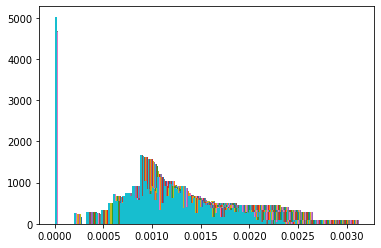

In [95]:
class ForecastingPipeline():
    def __init__(self, auto_arima):
        #TODO: make gamma a learnable parameter
        self.gamma = 10
        #significance level/threshold to compare pvalue of suspicious peaks to
        self.alpha = 0.3
        #represents the last n terms that we will use to compute an ewma when determining suspicious peaks
        self.delta = 8
        #represents beta in ewma - will determine the size of the moving window average we determine
        #for now, size of window =1/(1-0.6) which is 2.5
        self.beta = 0.9
        #represents the step taken towards exwa value
        self.mu = 1.5
        self.prophet_model = ProphetTimeStep()
        self.stat_sig_test = SignificanceTest()
        self.auto_arima = auto_arima
        self.predictions = np.array([])
        self.num_correct = 0
    
    #adjusts auto_arima prediction by making a proportional step in direction of prophet_pred and evaluates pvalue
    #size of step depends on confidence interval of prophet - if prophet is very confident of a prediction (meaning 
    #the gap between yhat_lower/upper is quite small), then a large is step is taken and vice versa    
    def make_adjustment(self, prophet_preds, auto_arima_pred, pvalue, sequence):
        #inverse the log(x+1) initally applied on the data
        sequence = list(map(lambda x: np.exp(x) + 1, sequence))
        print(sequence)
        #compute exponential moving average over last handful of terms to capture rate of change (potentially result
        #or build up of a suscpicious spike)
        exma_seq = self.stat_sig_test.ewma(sequence, self.beta)
        print("p-value: {0} adjustment: {1}".format(pvalue, exma_seq))
        rate_to_increment = self.mu*(1 - pvalue) if pvalue < self.alpha else 1/6
        for i in range(len(prophet_preds)):
            proportion = self.gamma/(prophet_preds.iloc[i]["yhat_upper"]-prophet_preds.iloc[i]["yhat_lower"])
            prophet_pred = prophet_preds.iloc[i]["yhat"]
            difference = prophet_pred - auto_arima_pred[i]
            auto_arima_pred[i] += difference*proportion + (rate_to_increment*exma_seq)
#             auto_arima_pred[i] = (2/3)*(auto_arima_pred[i]) + (1/6)*prophet_pred + rate_to_increment*exma_seq
        return auto_arima_pred
    
    
    #predict in waves of 2 e.g. predict at timestep t, t+1,  then update data to from the newly observed values
    # (i.e. actual ground truth labels at previous 4 timesteps) predict at t+2, t+3 and so on

    #Before we output our final prediction, we will make a step that is inversely proportional to yhat_upper -  
    #yhat_lower confidence interval provided by the prophet model. This means if prophet outputs a prediction that 
    #it's very confident about (meaning the confidence range is low), we will make a large step in the direction of 
    #yhat
    def fit_and_predict(self, test_data, month_data_prophet):
        self.num_correct = 0
        self.predictions = np.array([])
        for i in range(0,len(test_data),2):
            prophet_preds = self.prophet_model.predict_prophet(month_data_prophet, separation+i)
            seq_up_to_point = month_data_prophet[:separation+i]["y"].values
            pvalue = self.stat_sig_test.return_pvalue(seq_up_to_point)
            preds = self.auto_arima.model.predict(n_periods=2)
            #make a corresponding adjustment
            preds = self.make_adjustment(prophet_preds, preds, pvalue, seq_up_to_point[-self.delta:])
            self.predictions = np.append(self.predictions, preds)
            obs = test_data[i:i+2]
            array = list(range(2))
            correct_states_window = test_states.loc[i:i+2].values
            #update pipline so that model predicts from newly observed value
            self.auto_arima.model.update(obs, maxiter=10)
            correct_array = list(map(lambda x: compare_predicted_state_to_ground_truth(preds[x],
                                     correct_states_window[x]), array))
            self.num_correct += sum(correct_array)
            print("")
            print('>Predicted={0}, Expected={1}'.format(preds, obs))
        accuracy = self.num_correct/len(test_data)
        print("Accuracy: %.3f" % accuracy)
        return -mean_absolute_error(test_data, self.predictions)
    
    def return_errors(self, test_data):
        print("MAE: ", mean_absolute_error(test_data, self.predictions))
        print("RMSE: ", np.power(mean_squared_error(test_data, self.predictions), 0.5))
        
    #define function below which will be used by the Bayesian optimization algorithm
    def black_box_function(self, mu, gamma, beta, alpha):
        self.mu = mu
        self.gamma = gamma
        self.beta = beta
        self.alpha = alpha
        return self.fit_and_predict(test_data, month_data_burkina_prophet)
    
    def find_optimal_parameters(self):
        # Bounded region of parameter space
        pbounds = {'mu': (0, 5), 'gamma': (1, 100), 'beta':(0.1, 0.95), 'alpha':(0, 0.4)}
        optimizer = BayesianOptimization(
            f=self.black_box_function,
            pbounds=pbounds,
            verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
            random_state=1,
        )
        
        optimizer.maximize(
            init_points=2,
            n_iter=3,
        )
        print(optimizer.max)


pipeline = ForecastingPipeline(auto_arima)
# train_data_states = month_data_burkina[:separation]["State"]
# pipeline.fit_and_predict(test_data, month_data_burkina_prophet, test_states)
pipeline.find_optimal_parameters()


TODO:
1. Build cross-validation in prophet to find best parameters before fitting
2. Create some optimization function for ForecastingPipeline or build a network that finds best hyperparameters (either through grid search or something else)
3. Compute some performance metrics besides classification one we have been using e.g. MSE (mean-squared error), RSME (root mean squared error) and MAPE (mean absolute percentage error)
4. Right now, just making adjustments based on prophet and hypothesis test - experiment with other techniques like weighted average

**********

A quick note on exponentially moving averages, given $y_{t}$, an exponential moving average is defined as :

$y_{t}$ = $\beta$$y_{t-1}$ + (1-$\beta$)$\theta_{t}$

$\beta$ is a hyperparameter which can be interpreted as taking the average of 1/(1-$\beta$) previous timesteps. Therefore the closer $\beta$ is to 1, the more values it averages over, e.g. if $\beta$ = 0.5, then equivalent of taking an exponentially moving average over the two previous timesteps.

In the context of using this to help determine and make predict suspicious peak, using a large value of $\beta$ will mean the reuslt will adapt more slowly, thus if we want to pick up early on a sudden suspicious spike, a smaller $\beta$ will probably be more appropriate. The problem with using a smaller value of $\beta$ however will be our predictions may become more susceptible to outliers/more noisy.

Since we will only be taking a weighted average over the last couple of datapoints (around 3 or 4)- we will apply bias correction to make our estimates more accurate.

*************

Which test metric to use?
1. RMSE will penalize large differences - may be a good way to check whether we predict a spike or not (prefers smaller numbers)
2. MAE (Mean Absolute Error) - also prefers smaller numbers
3. MBE (Mean Bias Error) - similar to MAE but don't have absolute difference thus sign can give us information about whether we over/underestimate 
4. MAPE (Mean Absolute Percentage Error) looks at ratio - may give better holistic idea of how model is performing, especially across different countries which will have varying number of cases e.g. Burkina Faso tends to have a lot while Mauritania tends to have very little. However this also does not perform well when values are close to 0.

Idea: for each component in our forecasting pipeline, can choose to evalute a difference performance metric based on what behavior we desire to obtain from that component. For example, our significance test is designed to detect spikes, thus a good metric to optimize for would be RMSE since we want to reduce error on large spikes. 

Can use MAPE for prophet since we want to capture the seasonal trend and in general make "solid" predictions on year-round data as opposed to only detecting spikes.

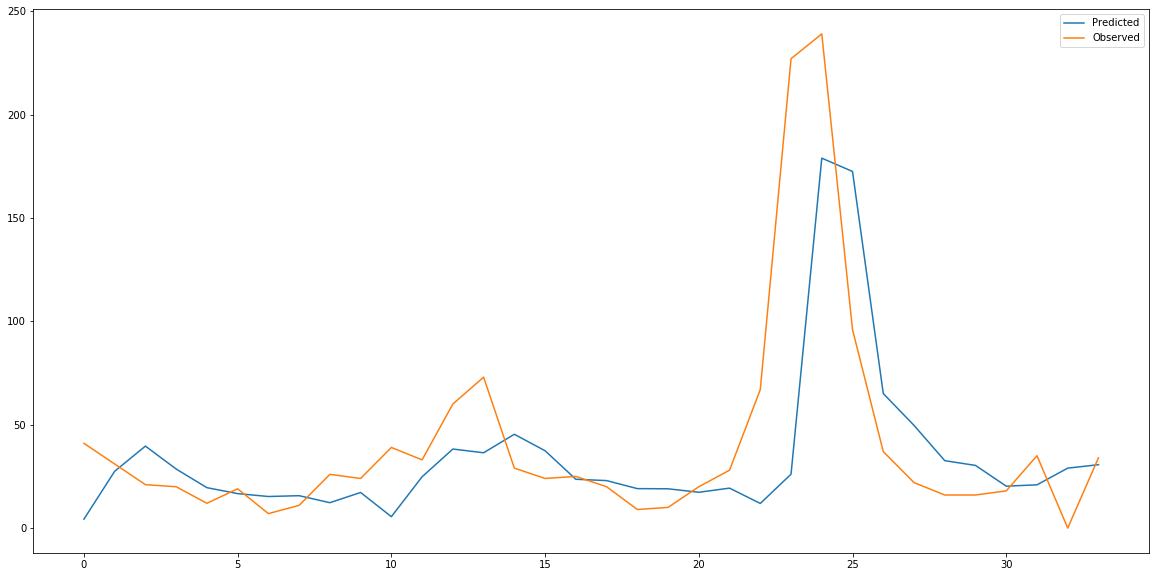

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(pipeline.predictions, label="Predicted")
ax.plot(test_data, label="Observed")
ax.legend()

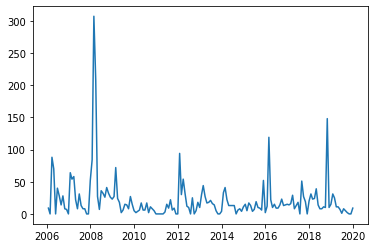

In [57]:
month_data_t = month_data.loc[month_data["Country"] == 5]
plt.plot(month_data_t["Date"].values, month_data_t["Cases"].values)

In [ ]:
#Training and testing on different parts of the year